# Анализ вакансий и резюме на сайте Head Hunter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
import statistics
import re

In [2]:
df = pd.read_excel("data_vacancies_cleaned.xlsx")
df.head()

,title,flag,experience,type_job,time_job,company_name,skills,date,where,salary_down,salary_up,salary_currency,type salary,vacansy_url,description
0,Аналитик (команда Поиска),data,1–3 года,Полная занятость,полный день,HeadHunter::Analytics/Data Science,"Анализ_данных,Математическая_статистика,SQL,Py...",2020-02-25,Москве,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/35121709,Ищем специалиста в команду Поиска: мы занимаем...
1,Data scientist/Портфельный аналитик,data,1–3 года,Полная занятость,полный день,"ООО, ,Поток.Диджитал","Python,Data_Mining,SQL,Моделирование,Портфельн...",2020-02-28,Москве,130000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35984434,NaN
2,Аналитик BI / Data scientist,data,1–3 года,Полная занятость,полный день,FBS Inc.,"SQL,Финансовое_моделирование,Математическое_мо...",2020-02-28,Санкт-Петербурге,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/33432328,", ,"
3,Artificial Intelligence and Data Analytics Sci...,data,3–6 лет,Полная занятость,полный день,Aramco Innovations,artificial_intellegence,2020-02-29,Москве,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/35697650,Aramco Research Center – Moscow is offering gr...
4,Аналитик,data,1–3 года,Полная занятость,полный день,EASTEX,"VBA,MS_Access,MS_SQL_Server,ABC-анализ,Статист...",2020-02-29,Москве,100000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35855160,


In [3]:
df_data = df[df['flag']== 'data']
df_data.head()

,title,flag,experience,type_job,time_job,company_name,skills,date,where,salary_down,salary_up,salary_currency,type salary,vacansy_url,description
0,Аналитик (команда Поиска),data,1–3 года,Полная занятость,полный день,HeadHunter::Analytics/Data Science,"Анализ_данных,Математическая_статистика,SQL,Py...",2020-02-25,Москве,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/35121709,Ищем специалиста в команду Поиска: мы занимаем...
1,Data scientist/Портфельный аналитик,data,1–3 года,Полная занятость,полный день,"ООО, ,Поток.Диджитал","Python,Data_Mining,SQL,Моделирование,Портфельн...",2020-02-28,Москве,130000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35984434,NaN
2,Аналитик BI / Data scientist,data,1–3 года,Полная занятость,полный день,FBS Inc.,"SQL,Финансовое_моделирование,Математическое_мо...",2020-02-28,Санкт-Петербурге,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/33432328,", ,"
3,Artificial Intelligence and Data Analytics Sci...,data,3–6 лет,Полная занятость,полный день,Aramco Innovations,artificial_intellegence,2020-02-29,Москве,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/35697650,Aramco Research Center – Moscow is offering gr...
4,Аналитик,data,1–3 года,Полная занятость,полный день,EASTEX,"VBA,MS_Access,MS_SQL_Server,ABC-анализ,Статист...",2020-02-29,Москве,100000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35855160,


In [4]:
df.describe()

,salary_down,salary_up
count,138097.000000,8.376500e+04
mean,48824.080190,7.382474e+04
std,33119.423597,7.943165e+04
min,35.000000,1.100000e+02
25%,30000.000000,3.745900e+04
50%,40000.000000,5.500000e+04
75%,60000.000000,9.000000e+04
max,1000000.000000,3.000000e+06


In [5]:
df_data.describe()


,salary_down,salary_up
count,1157.000000,728.000000
mean,72395.514261,95749.714286
std,48914.084551,72189.707372
min,200.000000,250.000000
25%,40000.000000,50000.000000
50%,60000.000000,80000.000000
75%,90000.000000,120000.000000
max,350000.000000,1000000.000000


In [6]:
df.dtypes

title                      object
flag                       object
experience                 object
type_job                   object
time_job                   object
company_name               object
skills                     object
date               datetime64[ns]
where                      object
salary_down               float64
salary_up                 float64
salary_currency            object
type salary                object
vacansy_url                object
description                object
dtype: object

## Строим графики

Text(0.5, 1.0, 'Распределение вакансий по дням(все вакансии)')

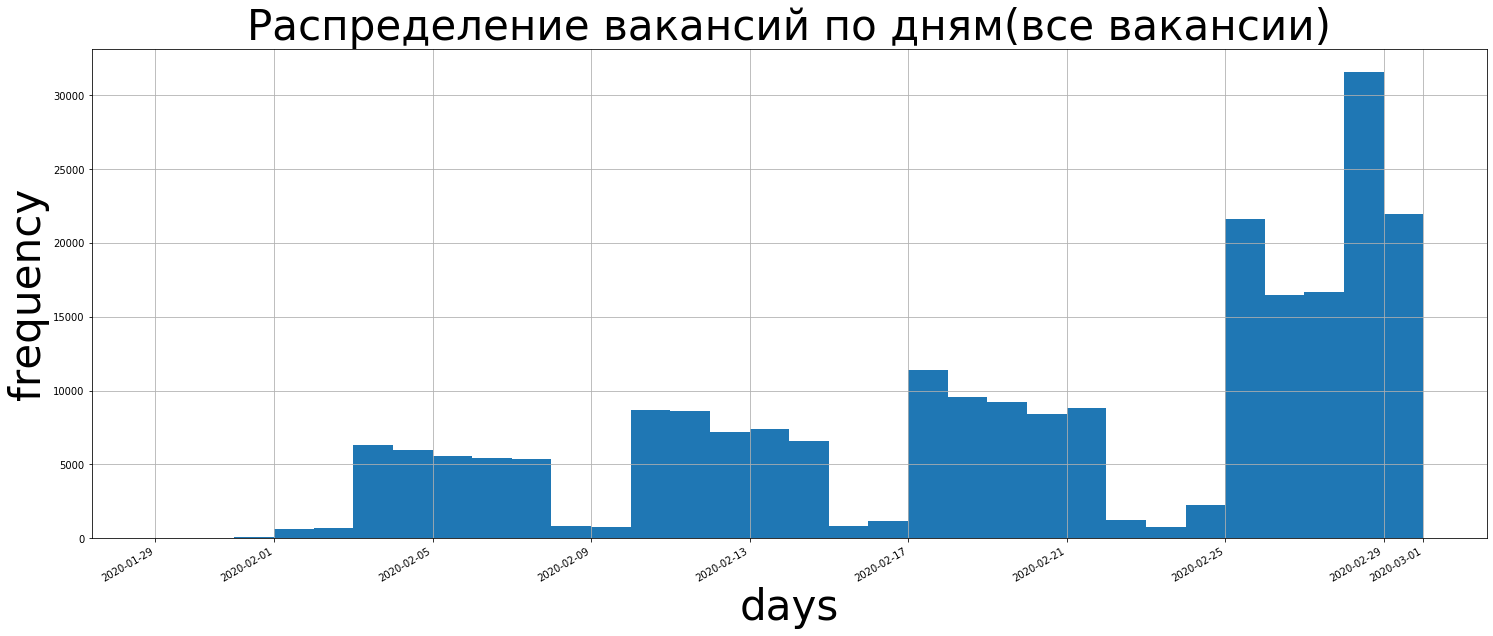

In [7]:
df['date'].hist (bins = 32)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('days', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по дням(все вакансии)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по дням(вакансии Data Science)')

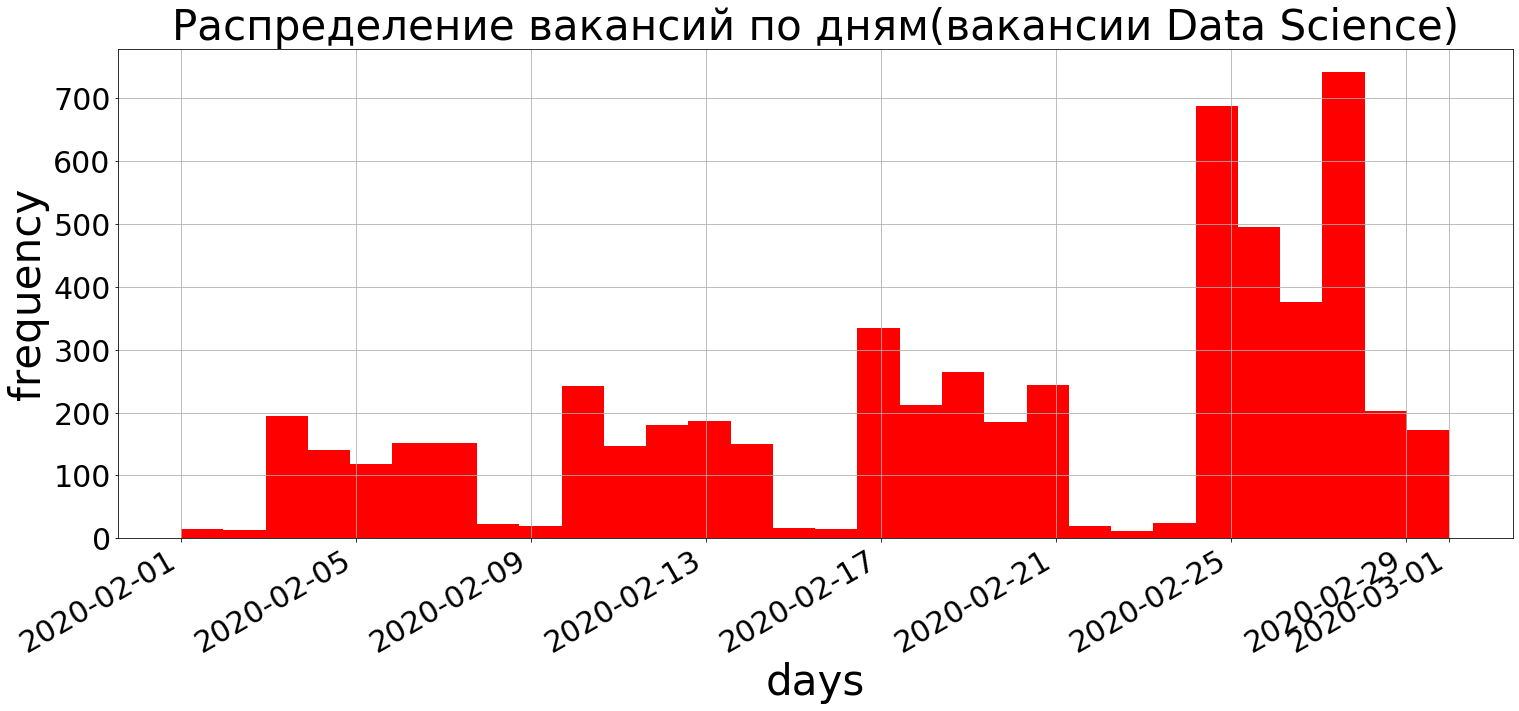

In [8]:
df_data['date'].hist (bins = 30, color = 'red')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('days', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по дням(вакансии Data Science)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по требуемому опыту работы (все вакансии)')

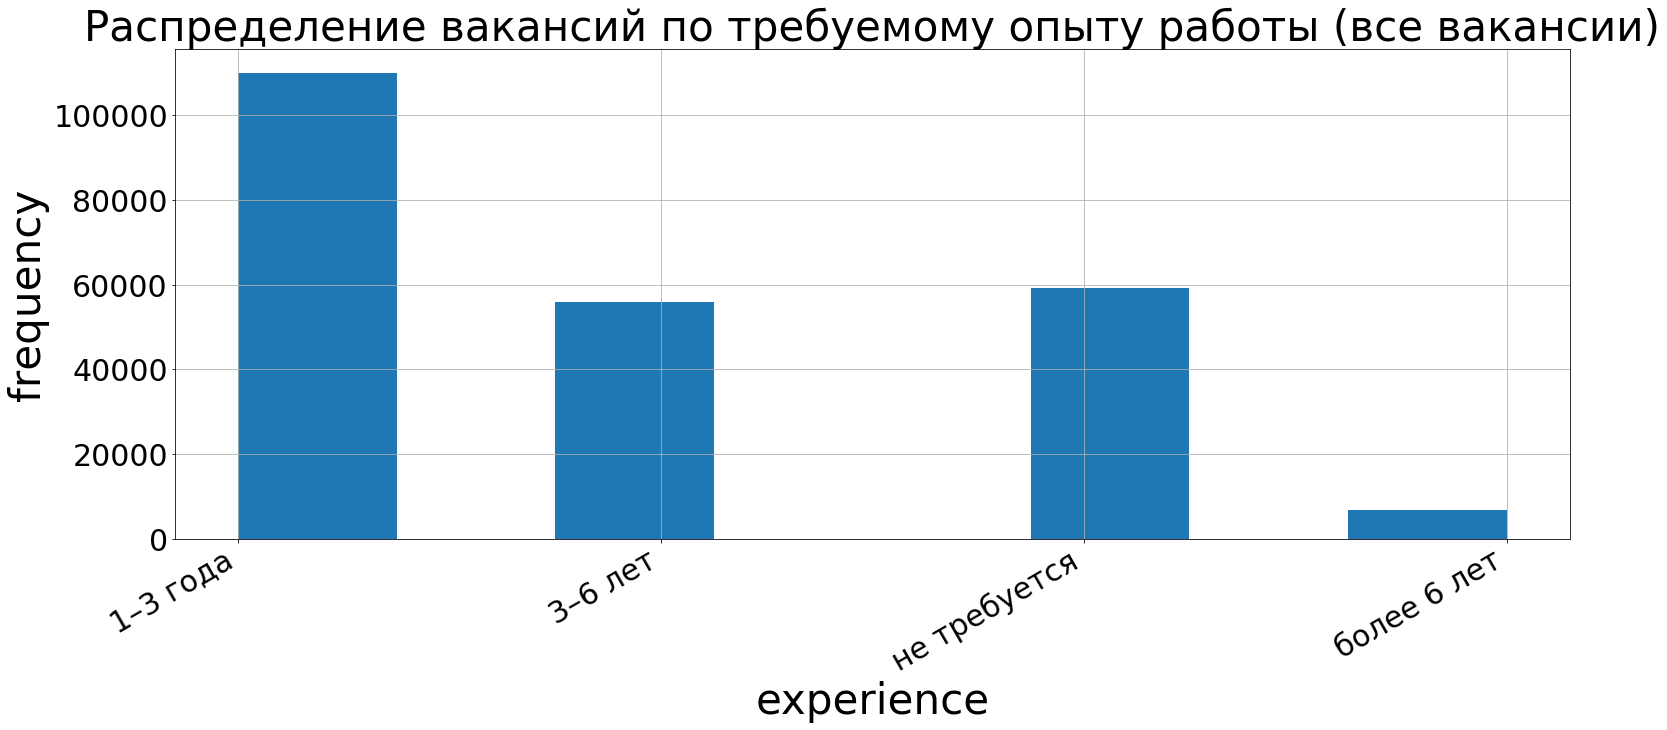

In [9]:
df['experience'].hist (bins = 8)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('experience', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по требуемому опыту работы (все вакансии)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по требуемому опыту работы (вакансии Data Science)')

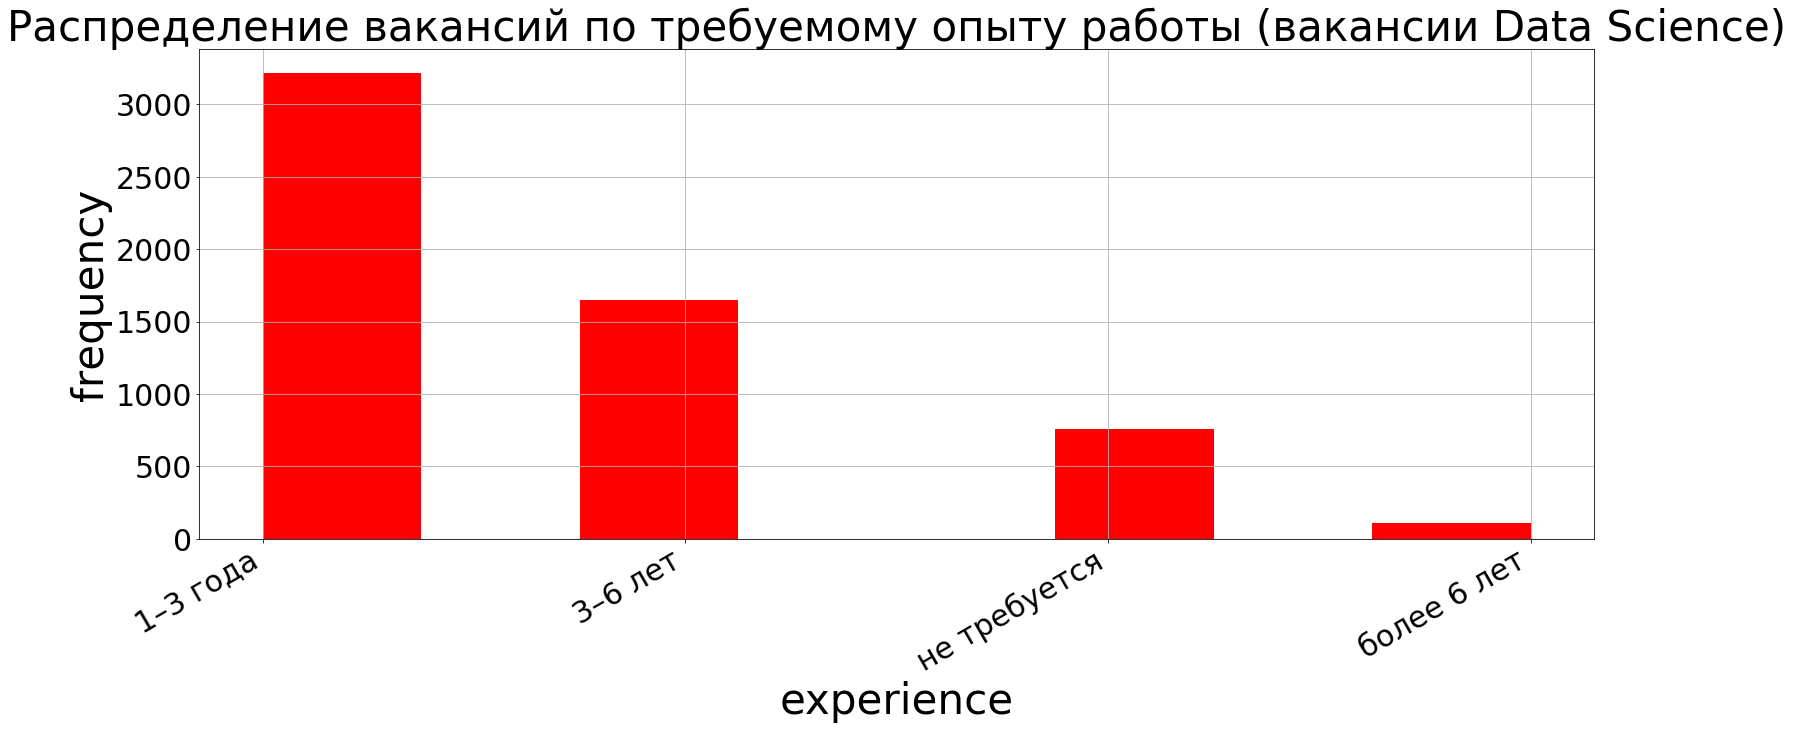

In [10]:
df_data['experience'].hist (bins = 8, color = 'red')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('experience', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по требуемому опыту работы (вакансии Data Science)', fontsize=42)

## Рассмотрим,почему у нас различаются графики

Text(0.5, 1.0, 'Распределение вакансий по требуемому опыту работы с учетом нижнего порога зар.платы')

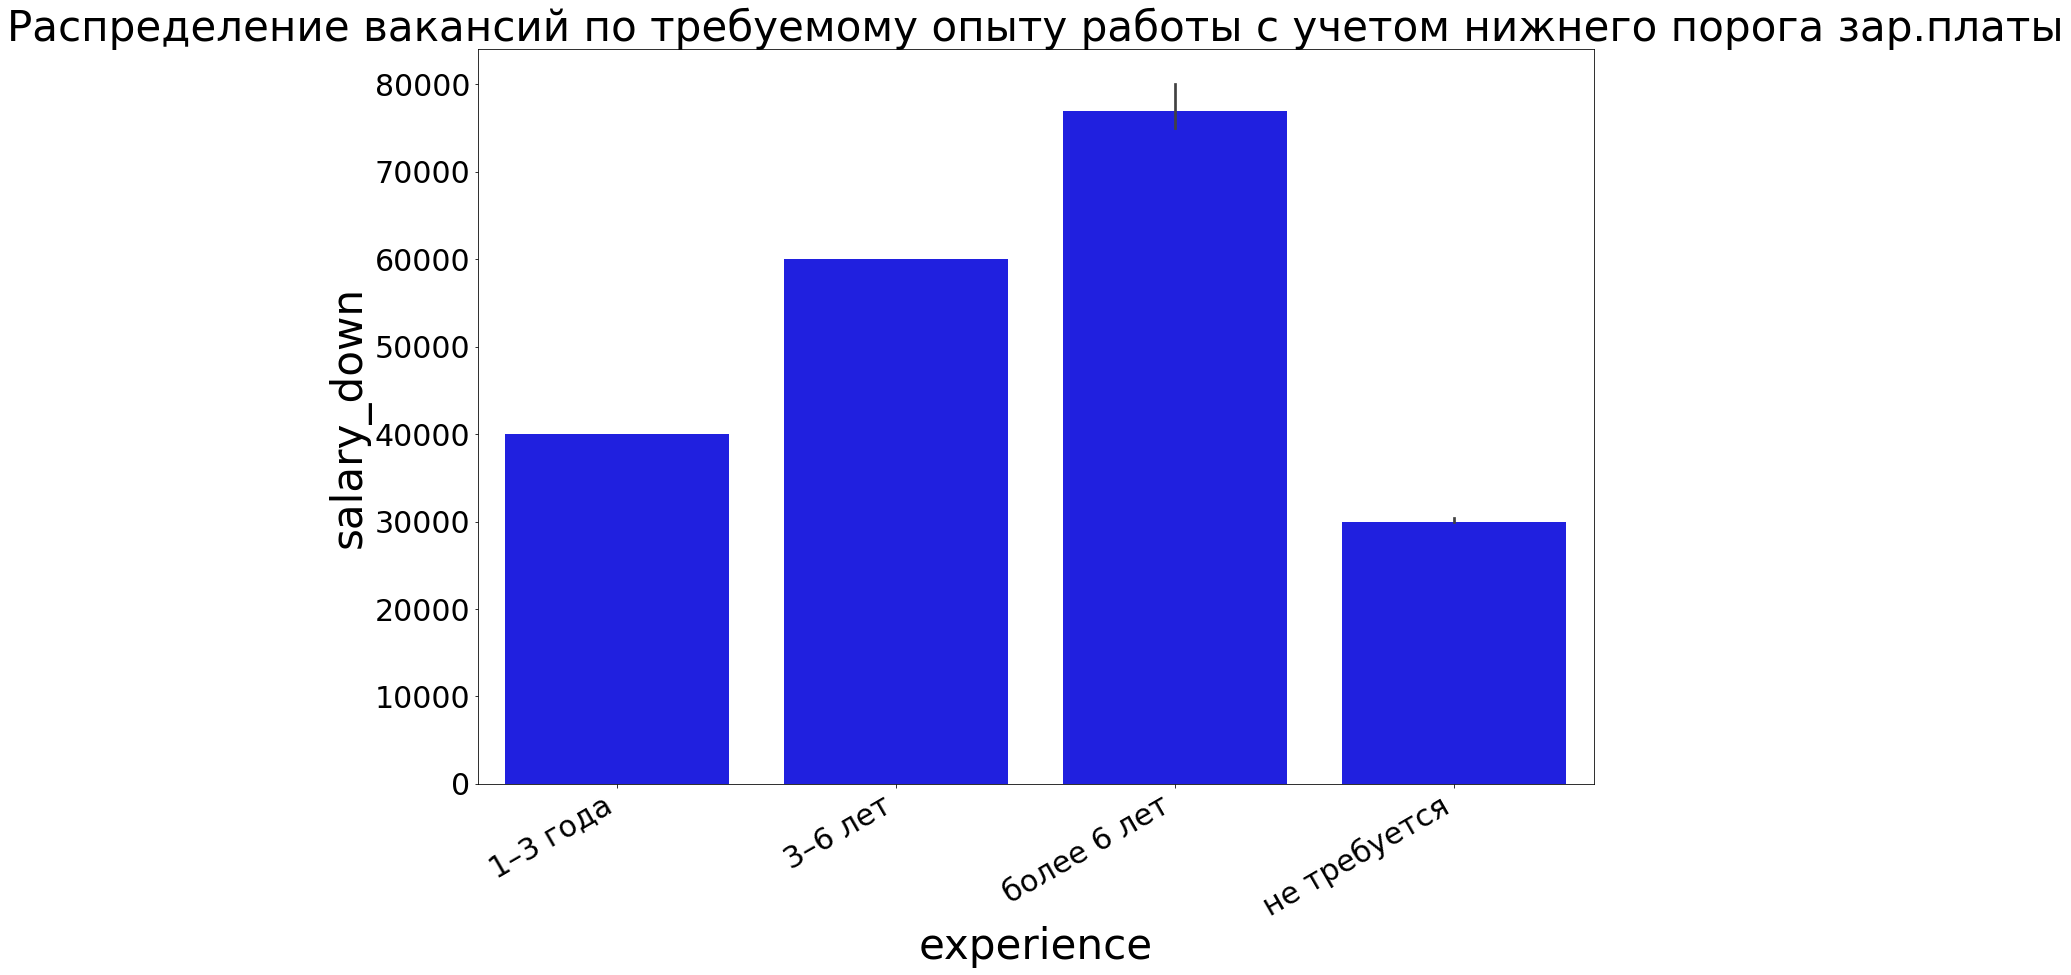

In [11]:
df_rur = df[df['salary_currency'] == 'RUR']
sns.barplot(x='experience', y='salary_down', data=df_rur, estimator=np.median, color = 'blue')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.xlabel('experience', fontsize=42)
plt.ylabel('salary_down', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(20,15)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по требуемому опыту работы с учетом нижнего порога зар.платы', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по требуемому опыту работы с учетом нижнего порога зар.платы (вакансии Data Science)')

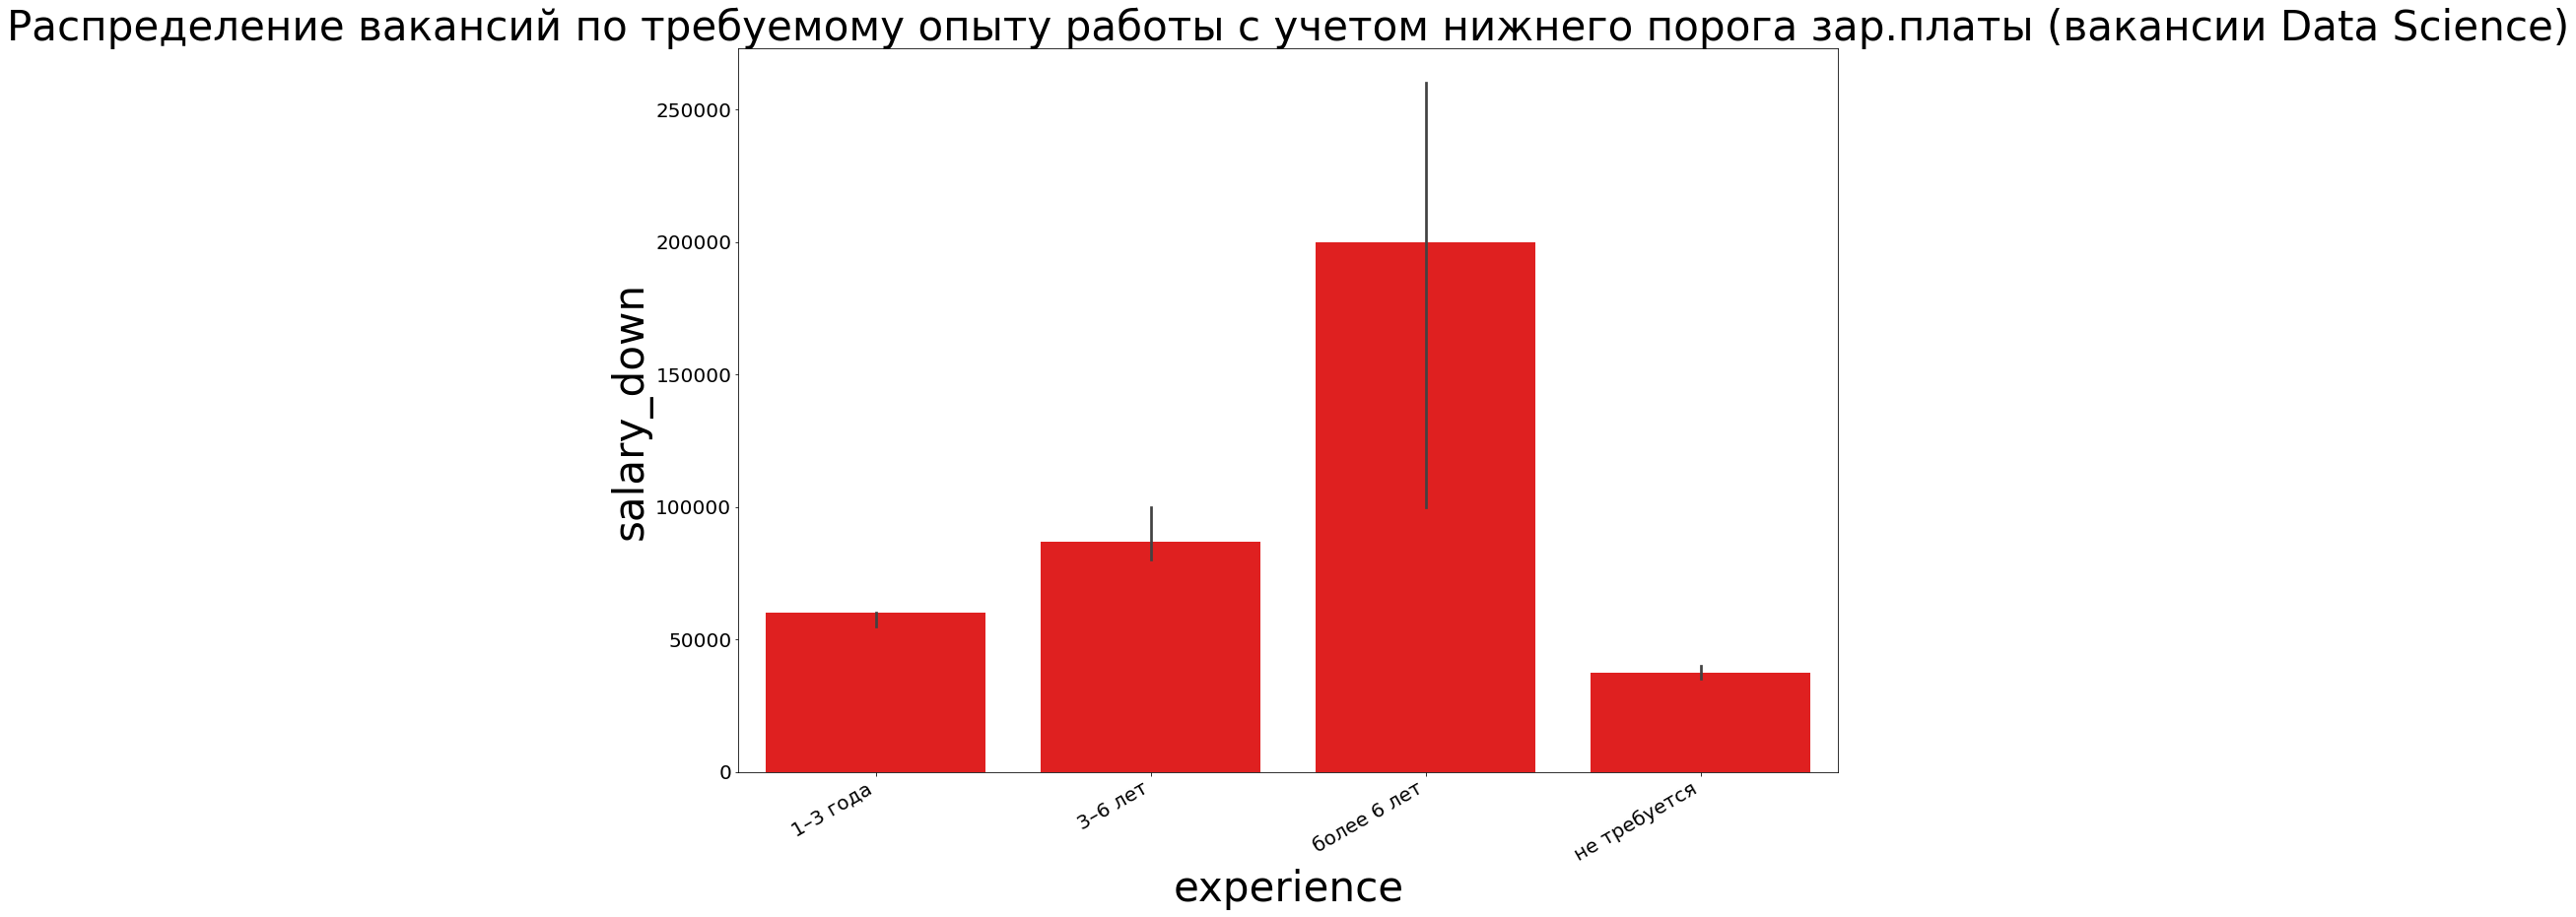

In [12]:
df_data_rur = df_rur[df_rur['flag'] == 'data']
sns.barplot(x='experience', y='salary_down', data=df_data_rur, estimator=np.median, color = 'red')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.xlabel('experience', fontsize=42)
plt.ylabel('salary_down', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(20,15)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по требуемому опыту работы с учетом нижнего порога зар.платы (вакансии Data Science)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по требуемому опыту работы с учетом нижнего порога зар.платы')

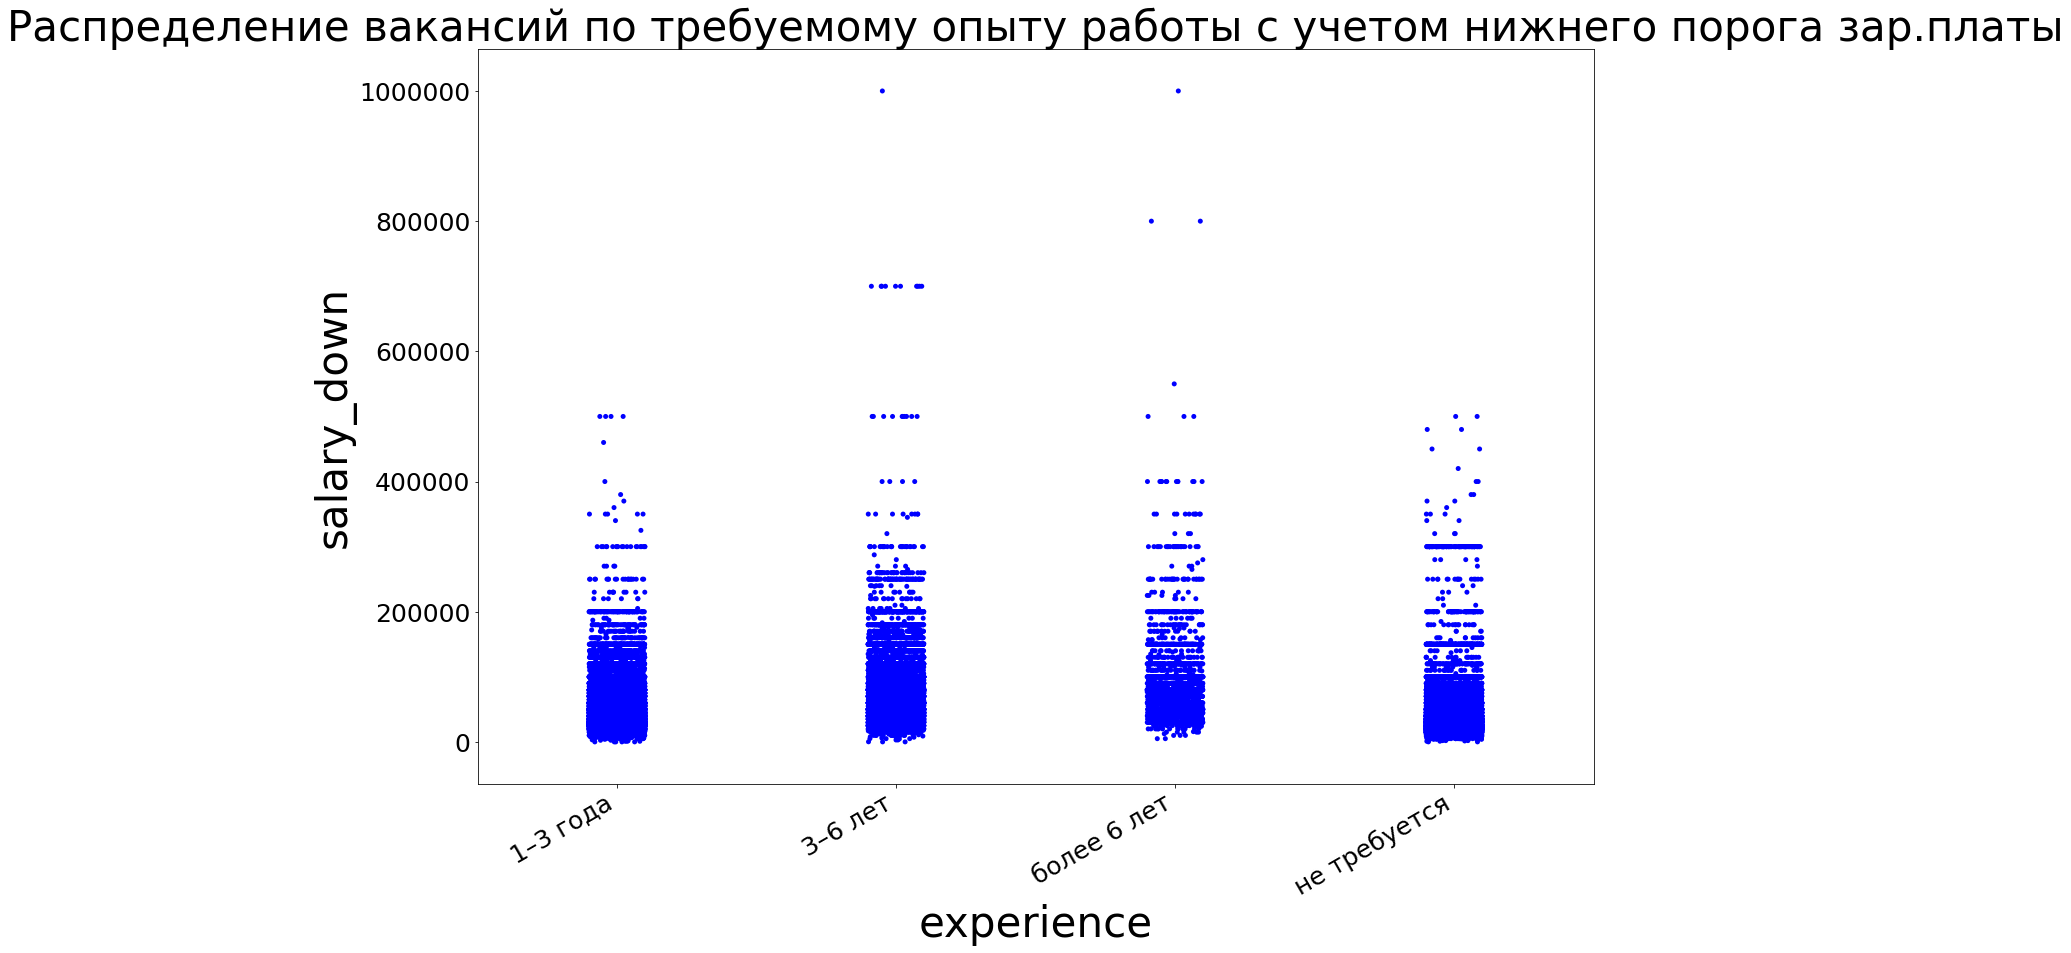

In [286]:
sns.stripplot(x='experience', y='salary_down', data=df_rur, jitter=True, color = 'blue')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.xlabel('experience', fontsize=42)
plt.ylabel('salary_down', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(20,15)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по требуемому опыту работы с учетом нижнего порога зар.платы', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по требуемому опыту работы с учетом нижнего порога зар.платы (вакансии Data Science)')

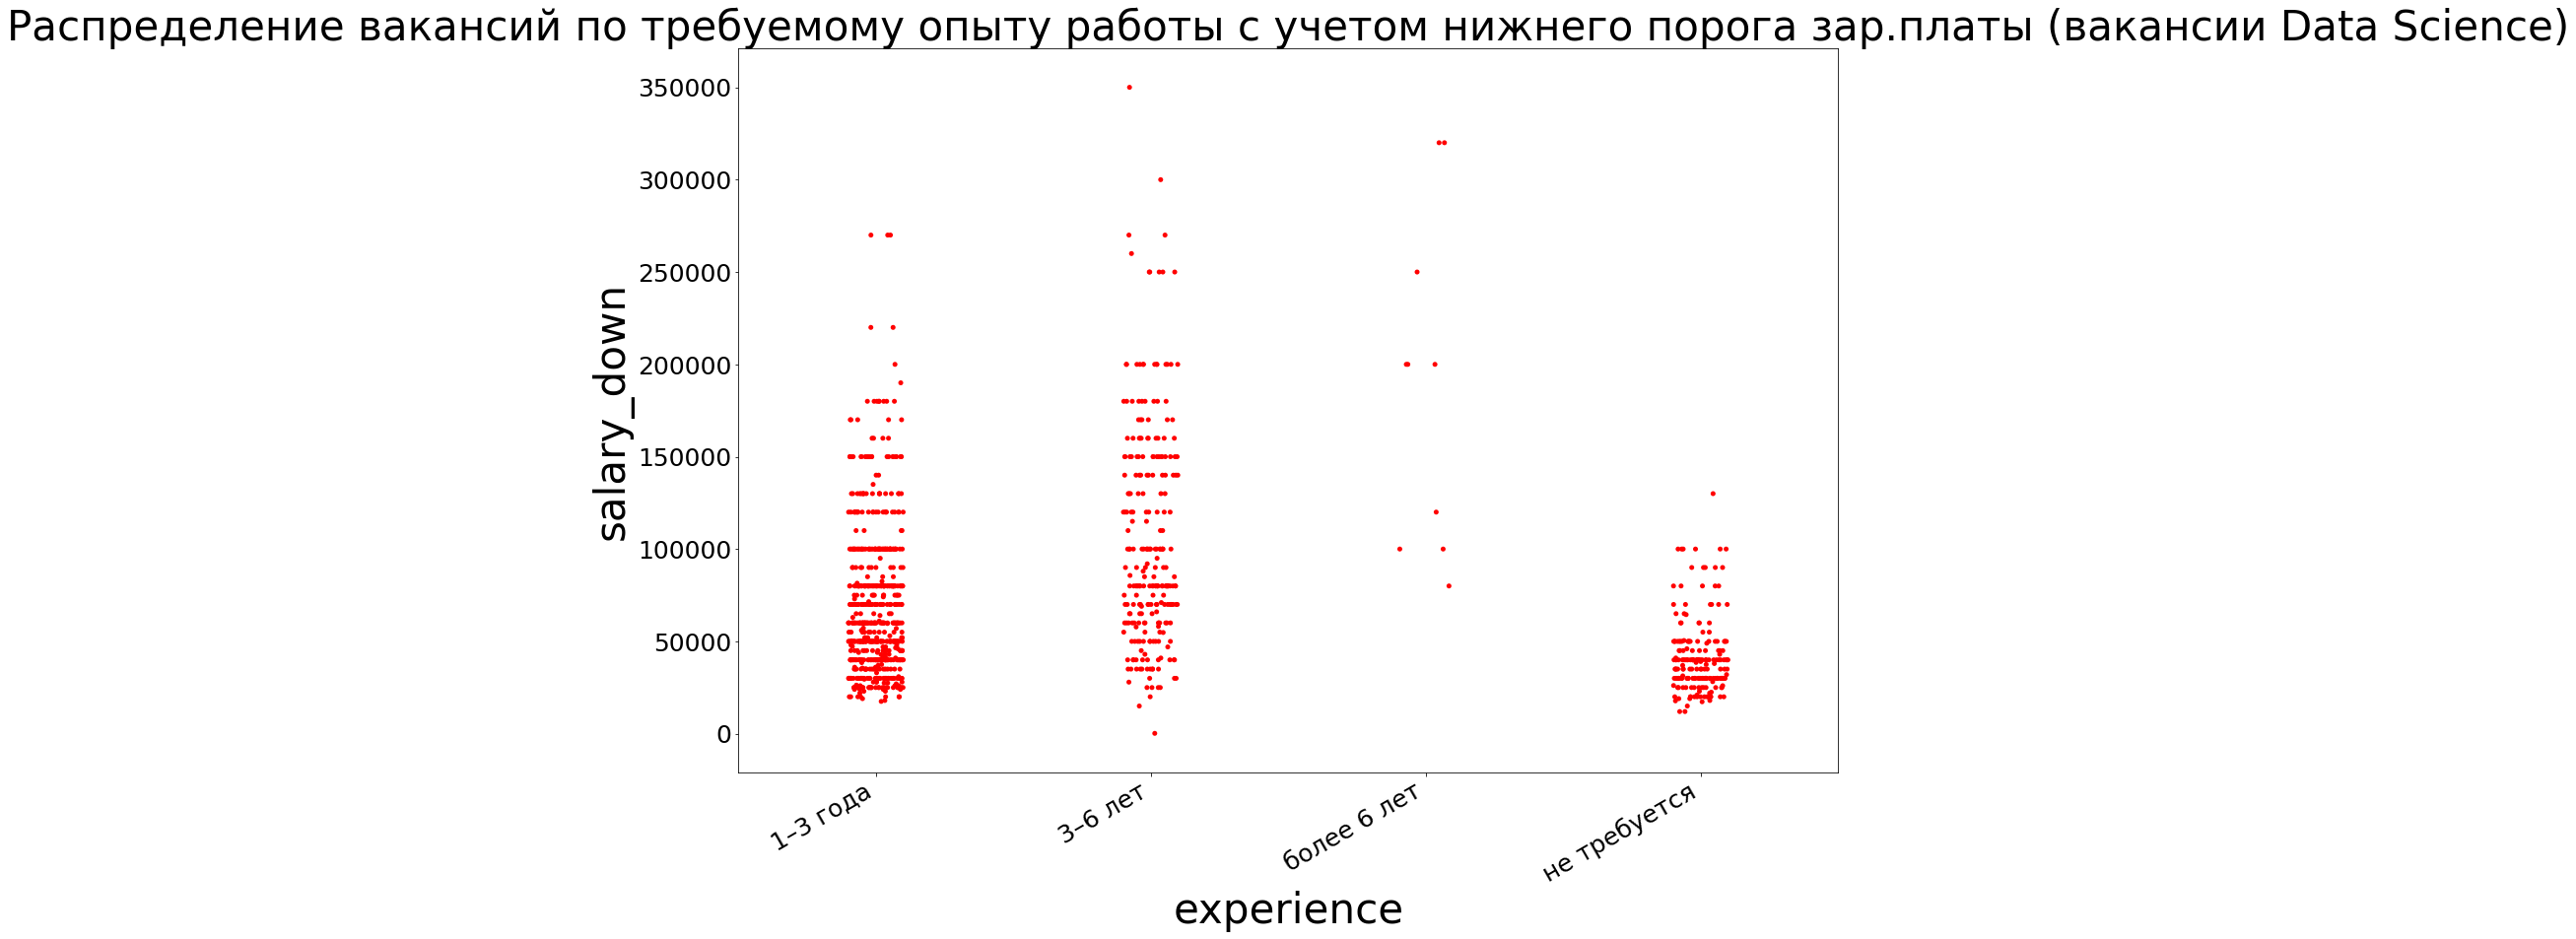

In [293]:
sns.stripplot(x='experience', y='salary_down', data=df_data_rur, jitter=True, color = 'red')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.xlabel('experience', fontsize=42)
plt.ylabel('salary_down', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(20,15)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по требуемому опыту работы с учетом нижнего порога зар.платы (вакансии Data Science)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по типу занятости (все вакансии)')

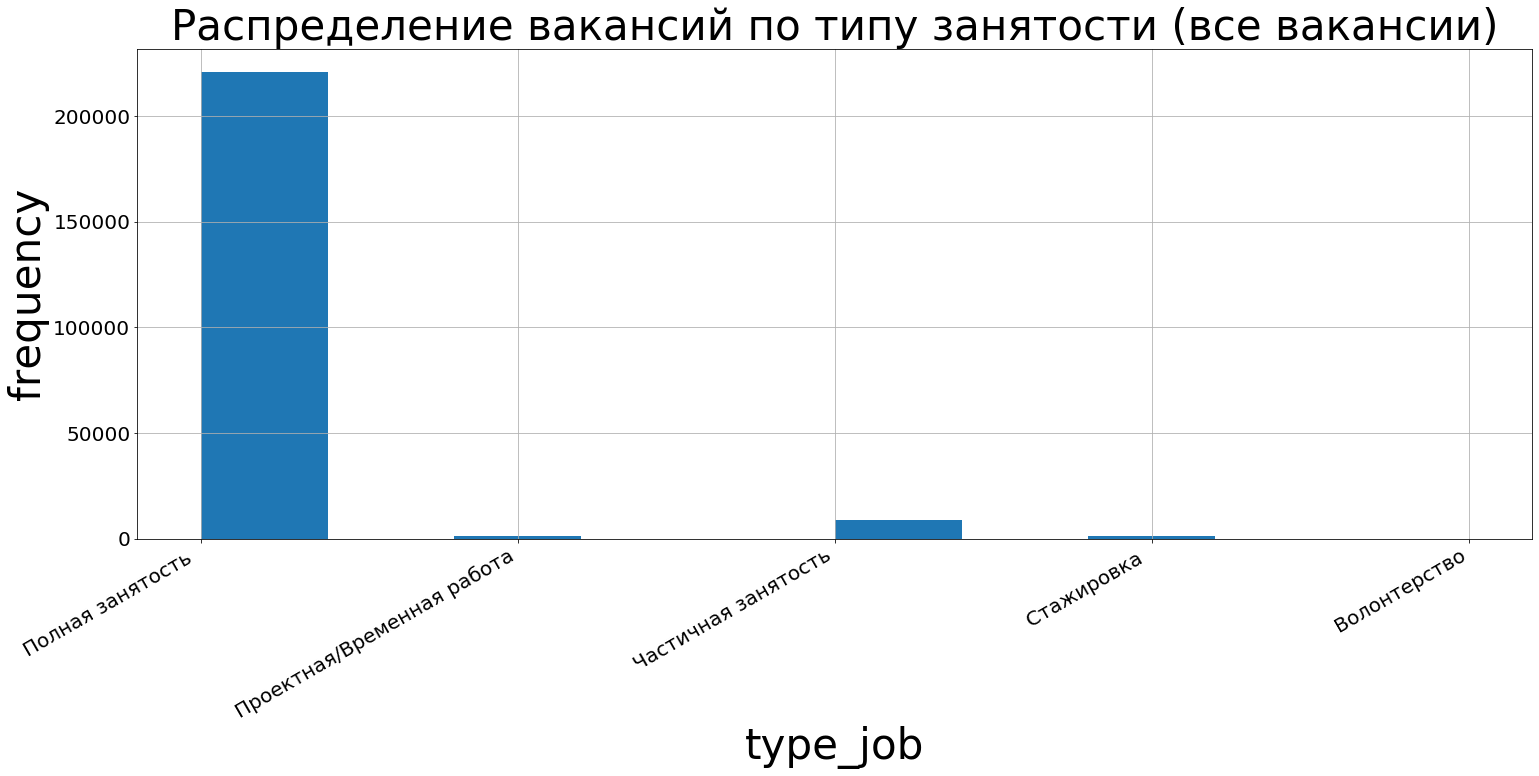

In [15]:
df['type_job'].hist (bins = 10)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('type_job', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по типу занятости (все вакансии)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по типу занятости (вакансии Data Science)')

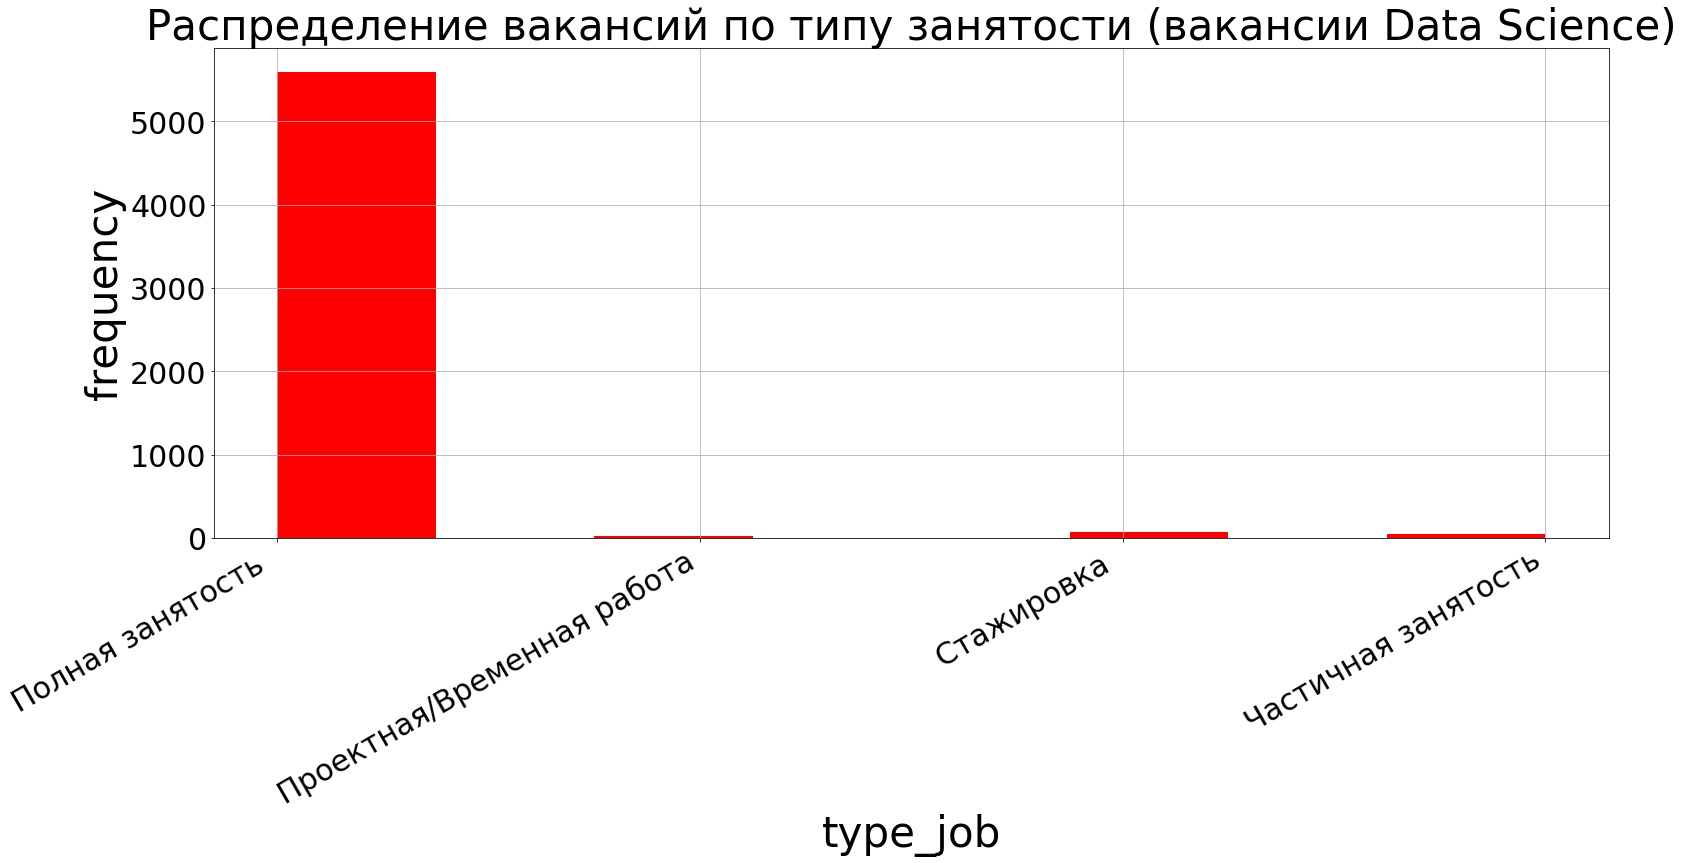

In [16]:
df_data['type_job'].hist (bins = 8, color = 'red')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('type_job', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по типу занятости (вакансии Data Science)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по типу рабочего дня (все вакансии)')

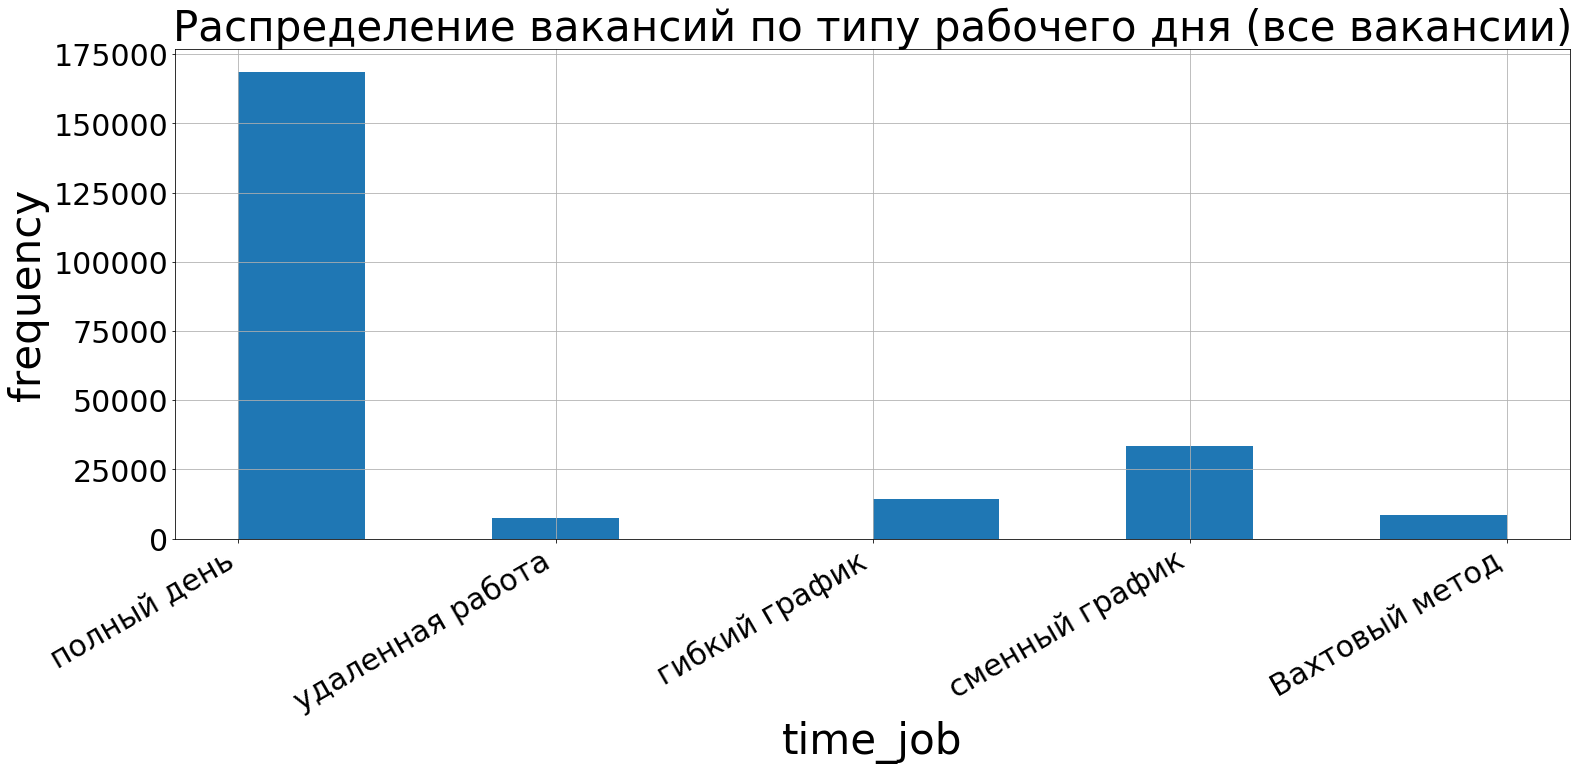

In [17]:
df['time_job'].hist (bins = 10)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('time_job', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по типу рабочего дня (все вакансии)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по типу рабочего дня (вакансии Data Science)')

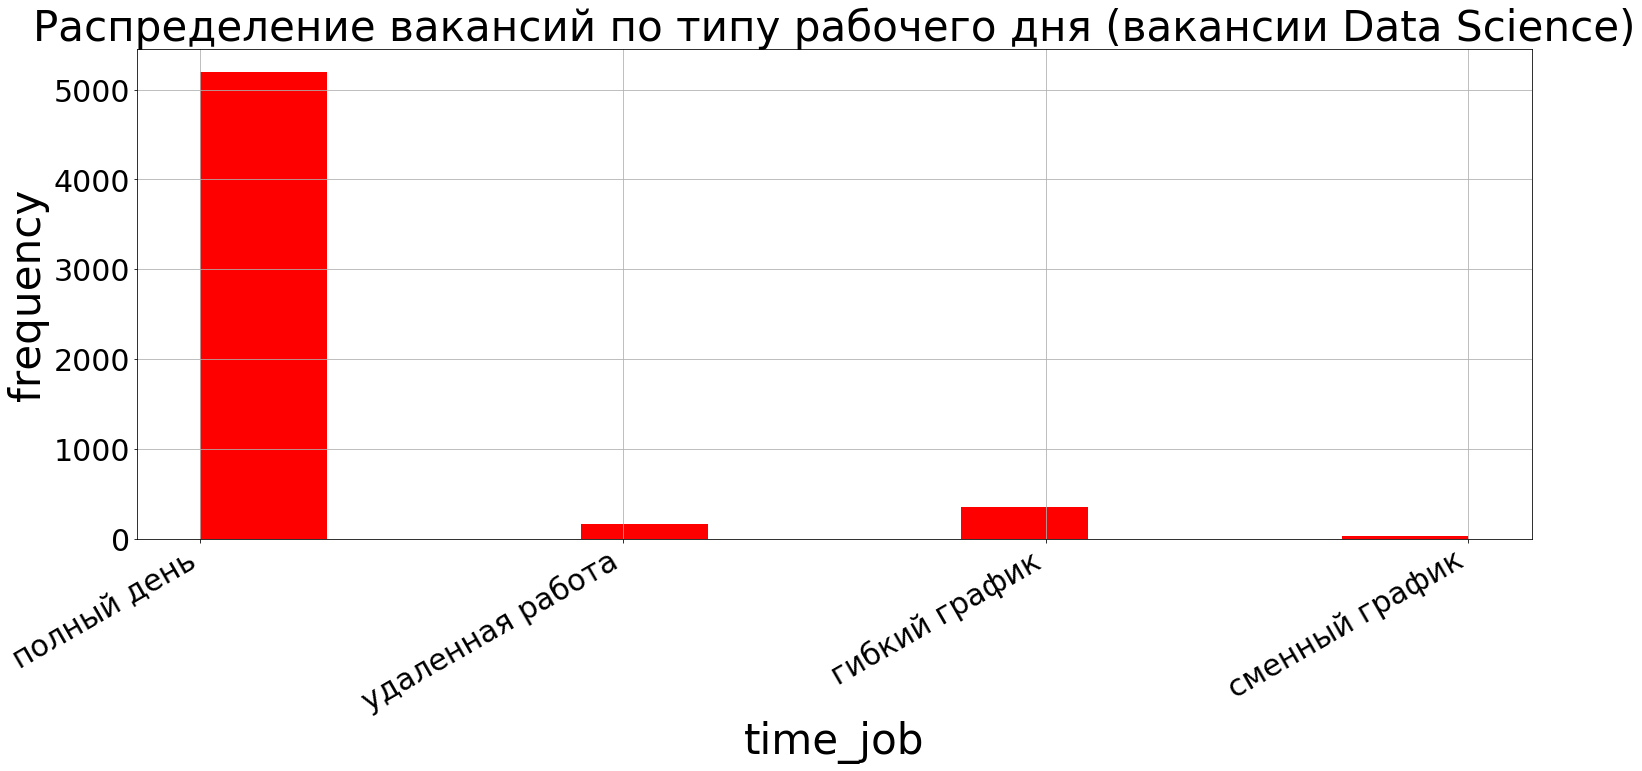

In [18]:
df_data['time_job'].hist (bins = 10, color = 'red')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('time_job', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по типу рабочего дня (вакансии Data Science)', fontsize=42)

## Считаем зарплату

Text(0.5, 1.0, 'Распределение вакансий по нижнему порогу зар.платы (все вакансии)')

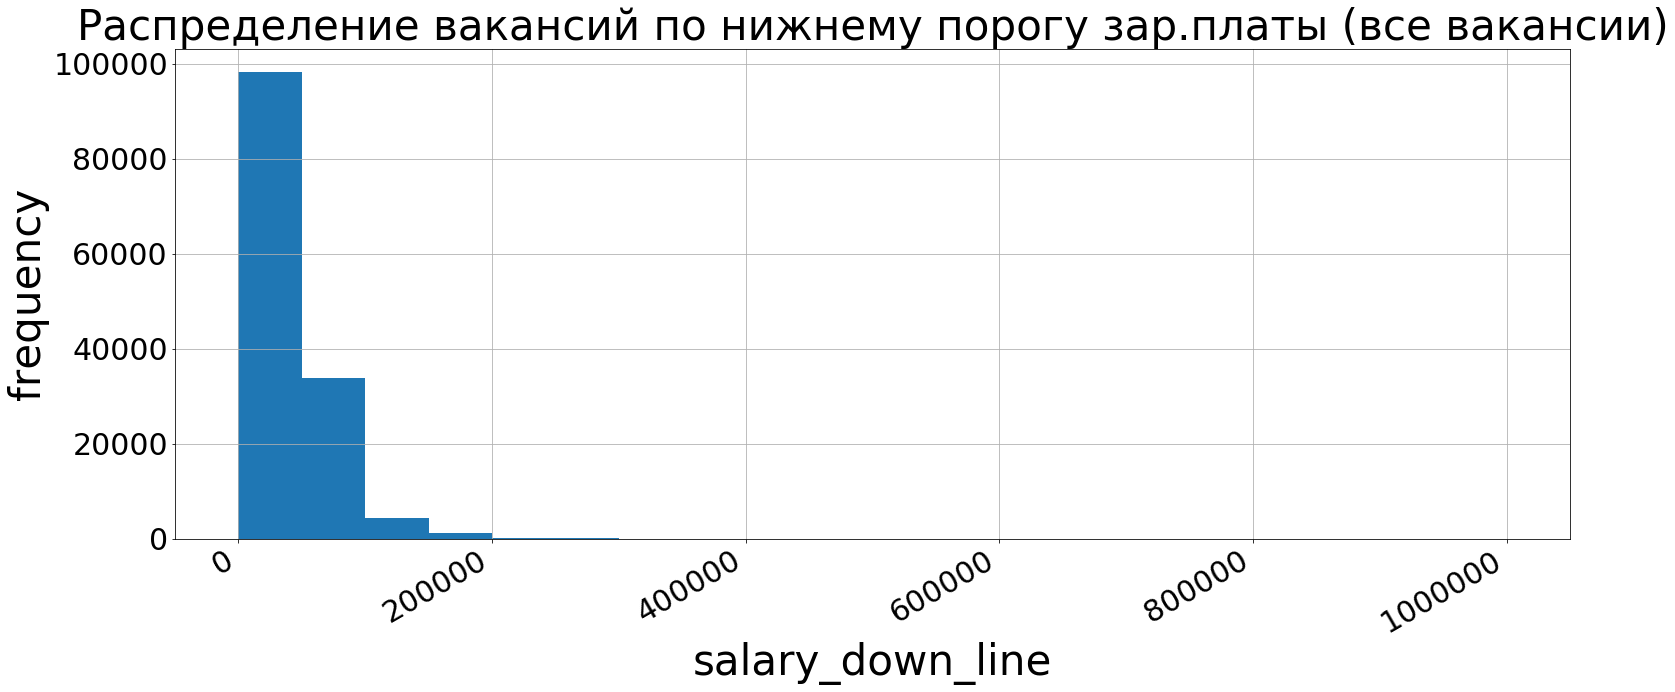

In [19]:
df['salary_down'].hist (bins = 20)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('salary_down_line', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по нижнему порогу зар.платы (все вакансии)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по нижнему порогу зар.платы (вакансии Data Science)')

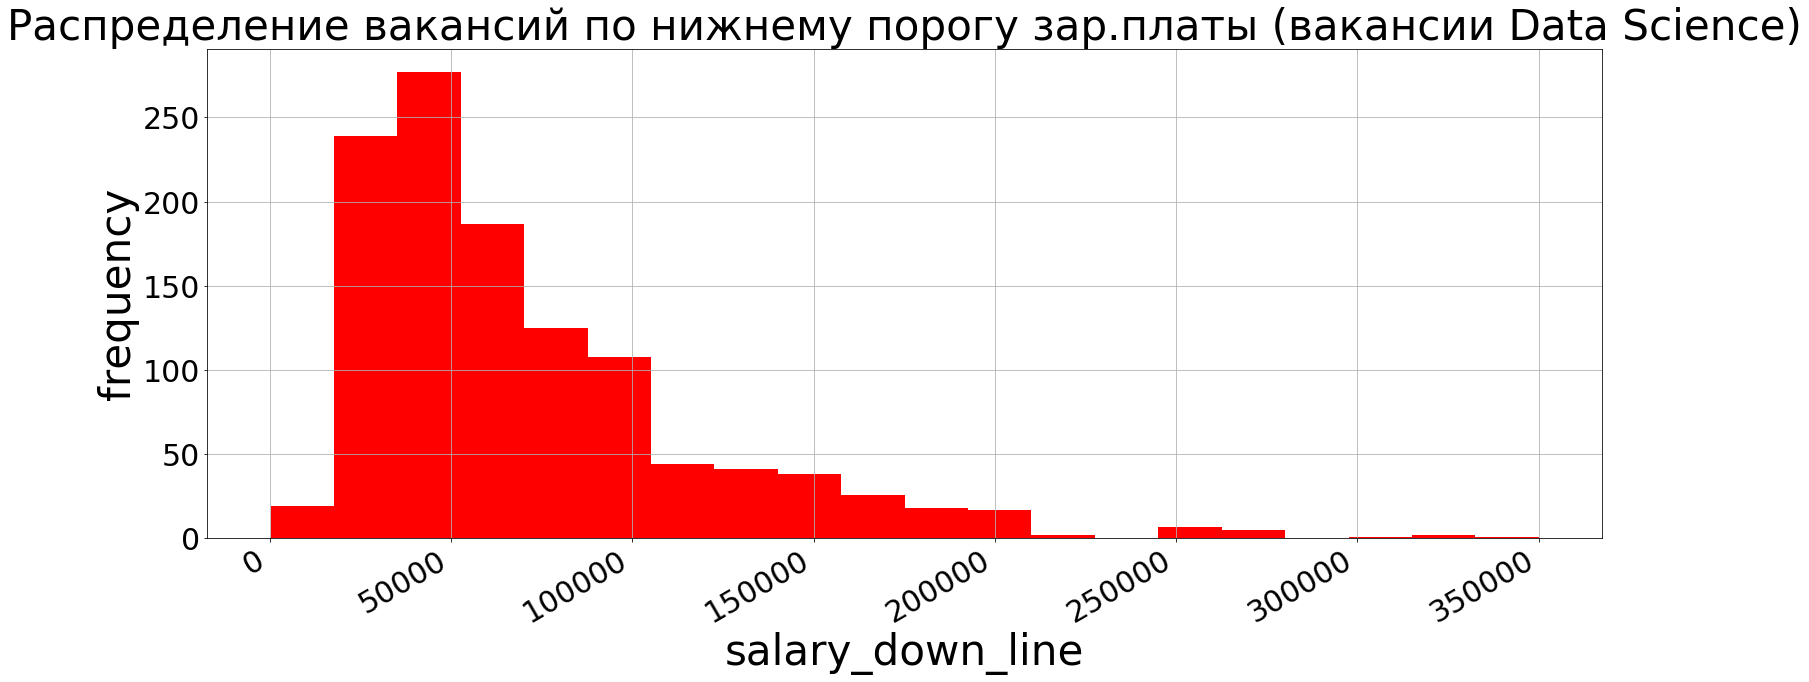

In [20]:
df_data['salary_down'].hist (bins = 20, color = 'red')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('salary_down_line', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по нижнему порогу зар.платы (вакансии Data Science)', fontsize=42)

In [21]:
df_rur = df[df['salary_currency'] == 'RUR']
df_rur.head()

,title,flag,experience,type_job,time_job,company_name,skills,date,where,salary_down,salary_up,salary_currency,type salary,vacansy_url,description
1,Data scientist/Портфельный аналитик,data,1–3 года,Полная занятость,полный день,"ООО, ,Поток.Диджитал","Python,Data_Mining,SQL,Моделирование,Портфельн...",2020-02-28,Москве,130000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35984434,NaN
4,Аналитик,data,1–3 года,Полная занятость,полный день,EASTEX,"VBA,MS_Access,MS_SQL_Server,ABC-анализ,Статист...",2020-02-29,Москве,100000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35855160,
9,Data Scientist (NLP),data,1–3 года,Полная занятость,полный день,Платформа ОФД,NoValue,2020-02-28,Москве,NaN,250000.0,RUR,на руки,https://hh.ru/vacancy/33811532,","
10,Junior Machine Learning Engineer,data,1–3 года,Полная занятость,полный день,"ООО, ,Claire&Clarté","Английский —_C1_—_Продвинутый,Python,Математич...",2020-02-28,Москве,NaN,140000.0,RUR,до вычета налогов,https://hh.ru/vacancy/36068146,Компания Claire&Clarté приглашает начинающего ...
11,Computer Vision / Data scientist CV,data,1–3 года,Полная занятость,полный день,"ООО, ,АлгоМост","Tensorflow,Keras,PyTorch,Computer_Vision,Python",2020-02-28,Москве,100000.0,200000.0,RUR,на руки,https://hh.ru/vacancy/35987551,Компания была создана в 2012 году и является р...


In [22]:
print(df_rur['salary_up'].count())
print(df_rur['salary_up'].mean())
print(df_rur['salary_up'].std())
print(df_rur['salary_up'].min())
print(df_rur['salary_up'].max())
df_rur.describe()

83495
74044.04514042757
79418.38014723845
110.0
3000000.0


,salary_down,salary_up
count,137712.000000,8.349500e+04
mean,48952.768161,7.404405e+04
std,33072.893965,7.941838e+04
min,35.000000,1.100000e+02
25%,30000.000000,3.800000e+04
50%,40000.000000,5.500000e+04
75%,60000.000000,9.000000e+04
max,1000000.000000,3.000000e+06


In [23]:
df_data_rur = df_rur[df_rur['flag'] == 'data']
df_data_rur.describe()

,salary_down,salary_up
count,1145.000000,716.000000
mean,73131.449782,97291.329609
std,48635.258912,71793.313676
min,200.000000,250.000000
25%,40000.000000,50000.000000
50%,60000.000000,80000.000000
75%,90000.000000,120000.000000
max,350000.000000,1000000.000000


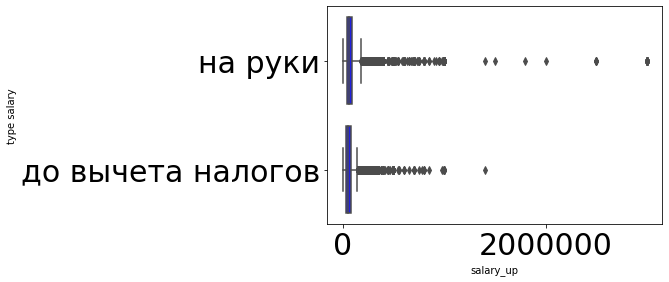

In [24]:
sns.boxplot(y='type salary', x ='salary_up', data = df_rur, color = 'blue')

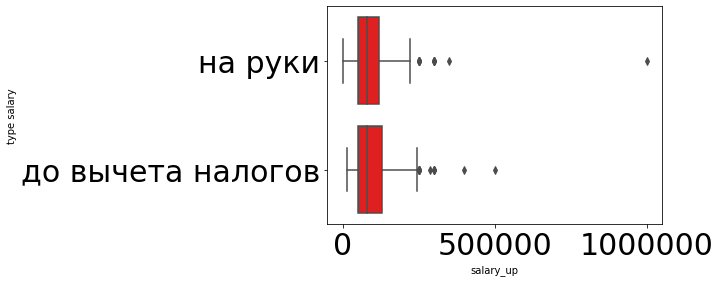

In [25]:
sns.boxplot(y='type salary', x ='salary_up', data = df_data_rur, color = 'red')

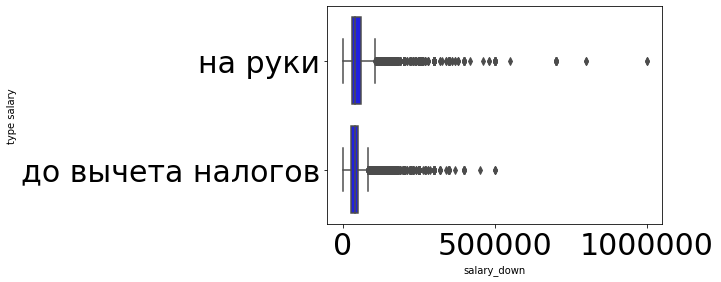

In [26]:
sns.boxplot(y='type salary', x ='salary_down', data = df_rur, color = 'blue')

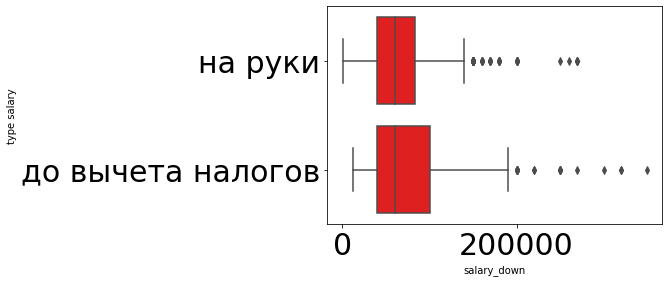

In [27]:
sns.boxplot(y='type salary', x ='salary_down', data = df_data_rur, color = 'red')

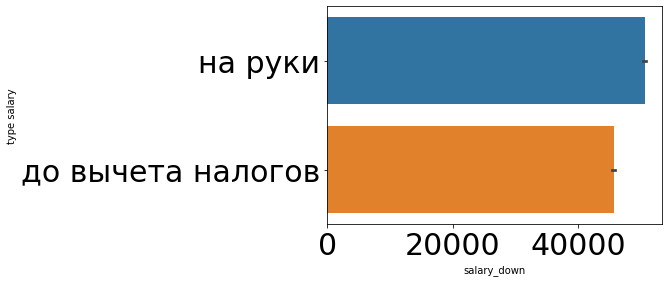

In [28]:
sns.barplot(x= 'salary_down', y= 'type salary', data = df_rur)

<BarContainer object of 200 artists>

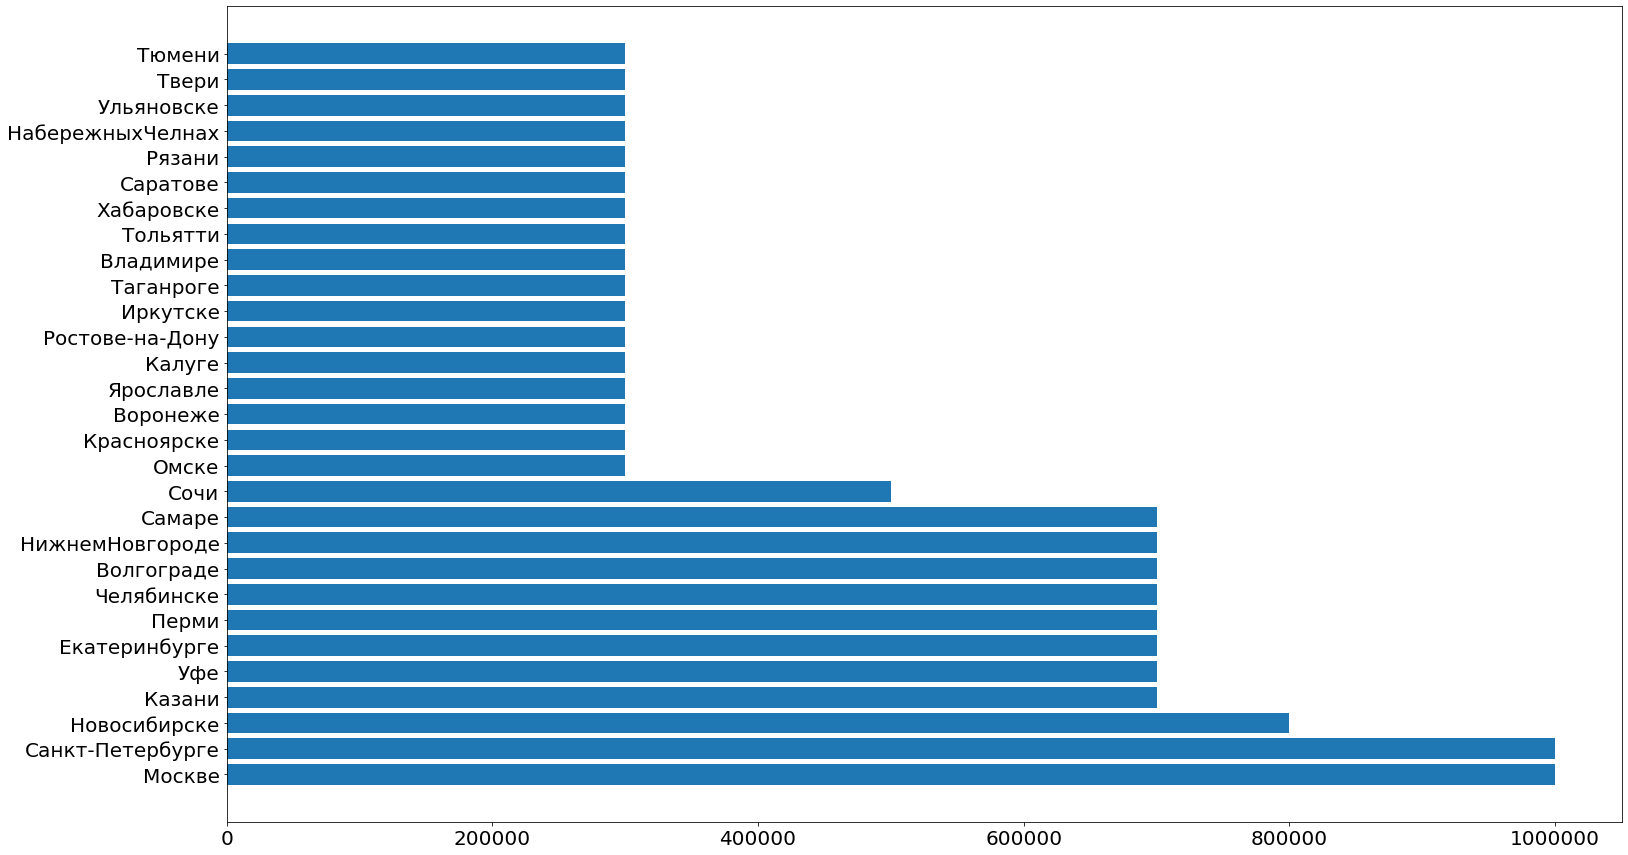

In [29]:
rur_barh = df_rur.sort_values('salary_down',ascending = False).head (200)
rur_barh_data = df_data_rur.sort_values('salary_down',ascending = False).head (200)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.barh(rur_barh['where'], rur_barh['salary_down'])

Text(0.5, 1.0, 'Распределение самых высоких зарплат по городам (вакансии Data Science)')

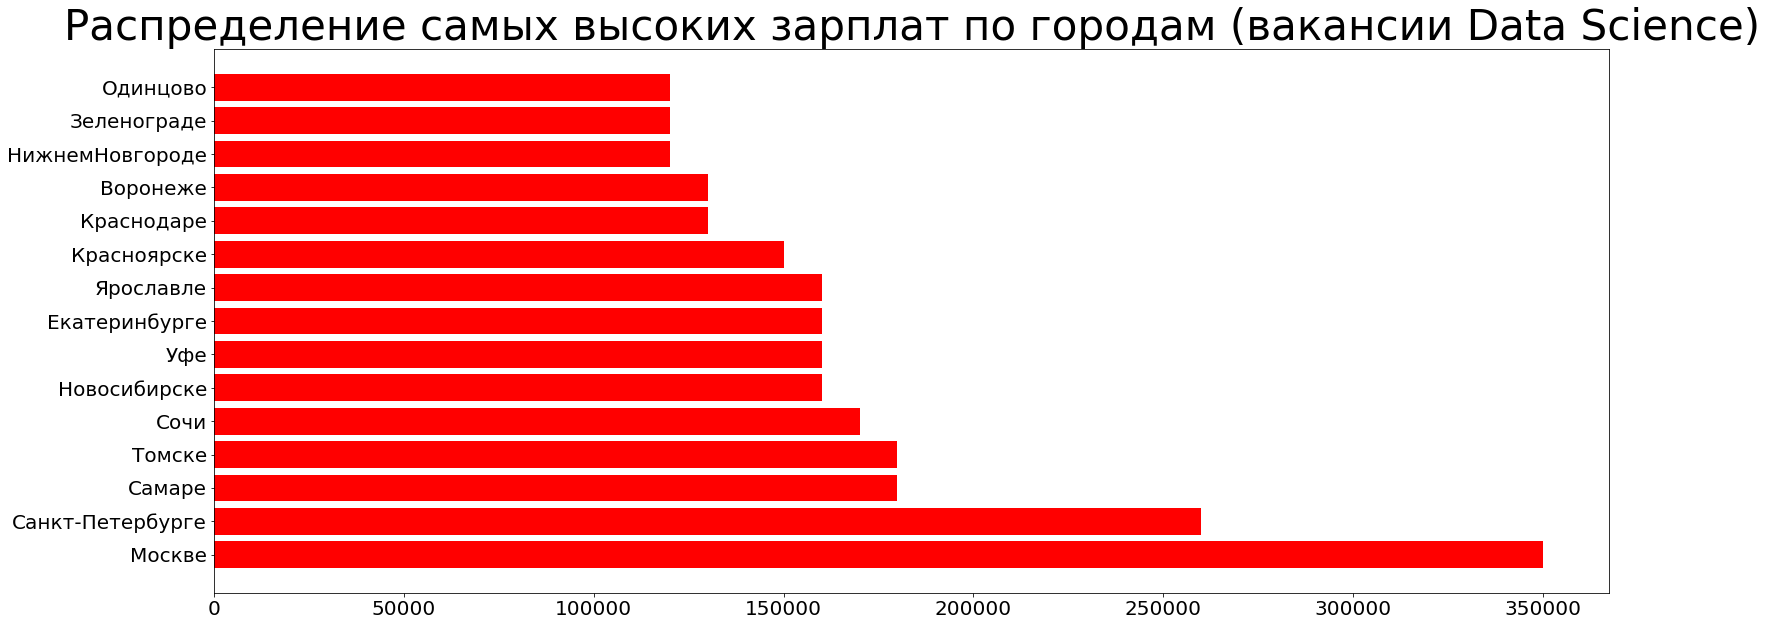

In [30]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.barh(rur_barh_data['where'], rur_barh_data['salary_down'], color = 'red')
plt.title ('Распределение самых высоких зарплат по городам (вакансии Data Science)', fontsize=42)

In [31]:
df_groupped = df_rur.groupby ('where').agg (('mean', 'median'))
df_groupped = df_groupped ['salary_down'].sort_values('median',ascending = False)
df_groupped['median'].head(60)

where
Дубне                           140000.0
Одинцово                        120000.0
Подольске(Московскаяобласть)     80000.0
Нижневартовске                   70000.0
Магнитогорске                    70000.0
Симферополе                      57000.0
Южно-Сахалинске                  52000.0
Кургане                          50000.0
Сочи                             50000.0
Владивостоке                     50000.0
Пензе                            50000.0
Москве                           50000.0
Королеве                         45000.0
Солнечногорске                   45000.0
Зеленограде                      45000.0
Химках                           45000.0
Хабаровске                       42000.0
Санкт-Петербурге                 42000.0
Иркутске                         40000.0
Новосибирске                     40000.0
Тюмени                           40000.0
Екатеринбурге                    40000.0
Лобне                            40000.0
Мурманске                        40000.0
Красногорс

In [32]:
df_groupped_data = df_data_rur.groupby ('where').agg (('count', 'median'))
df_groupped_data = df_groupped_data ['salary_down'].sort_values('median',ascending = False)
df_groupped_data.head(30)

,count,median
where,,
Сочи,3,130000.0
Одинцово,2,120000.0
Москве,513,80000.0
Зеленограде,8,75750.0
Череповце,1,60000.0
Владивостоке,27,60000.0
Челябинске,9,60000.0
Магнитогорске,1,60000.0
Санкт-Петербурге,136,60000.0


## Считаем скилы

In [33]:
from itertools import groupby
skill_list = []
def skilllist(Column_Dataset):
    #skill_list = []
    for skill in Column_Dataset:

        skill = str(skill).split(",")
        skill.sort()

        skill = [el for el, _ in groupby(skill)]
        skill_list.append(skill)
    return skill_list

In [34]:
sk_lists = skilllist(df_data['skills'])
sk_lists

[['Data_Mining',
  'Python',
  'SQL',
  'data_science',
  'hadoop',
  'hive',
  'numpy',
  'scipy',
  'statsmodel',
  'Анализ_данных',
  'Математическая_статистика'],
 ['Data_Mining',
  'Python',
  'SQL',
  'Анализ_данных',
  'Математическая_статистика',
  'Математическое_моделирование',
  'Моделирование',
  'Портфельные_риски'],
 ['Business_intelligence',
  'PostgreSQL',
  'Python',
  'R',
  'SQL',
  'WEB_аналитика',
  'data_science',
  'machine_learning',
  'Веб-аналитика',
  'Конкурентная_аналитика',
  'Математическое_моделирование',
  'Финансовое_моделирование'],
 ['artificial_intellegence'],
 ['ABC-анализ',
  'MS_Access',
  'MS_SQL_Server',
  'VBA',
  'Анализ_бизнес_показателей',
  'Аналитика_продаж',
  'Математический_анализ',
  'Статистический_анализ'],
 ['Java', 'Linux', 'MySQL', 'PHP', 'SQL'],
 ['Python',
  'SQL',
  'Аналитические_исследования',
  'Английский_язык',
  'Бизнес-анализ'],
 ['Big_Data', 'Data_Analysis', 'Python'],
 ['MS_Access',
  'MS_Excel',
  'MS_PowerPoint',
  

In [36]:
with open('skill_list.txt','w') as i:
    for item in sk_lists:
        i.write("%s\n" % item)

## Здесь я пыталась построить рекомендательную систему

In [37]:
dataset = pd.read_excel('skill_list_1.xlsx', header = None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Data Mining,Python,SQL,data science,hadoop,hive,numpy,scipy,statsmodel,Анализ данных,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data Mining,Python,SQL,Анализ данных,Математическая статистика,Математическое моделирование,Моделирование,Портфельные риски,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Business intelligence,PostgreSQL,Python,R,SQL,WEB аналитика,data science,machine learning,Веб-аналитика,Конкурентная аналитика,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,artificial intellegence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABC-анализ,MS Access,MS SQL Server,VBA,Анализ бизнес показателей,Аналитика продаж,Математический анализ,Статистический анализ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,Java,MS SQL,MS SQL Server,Oracle Pl/SQL,PostgreSQL,Power BI,Python,SQL,Tableau,Аналитический склад ума,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5730,CSS,HTML,Linux,Python,SQL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5731,Data Mining,Python,Анализ данных,Аналитические исследования,Аналитическое мышление,Бизнес-анализ,Математическая статистика,Машинное обучение,Работа в команде,Работа с большим объемом информации,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5732,NoValue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
items = []
for i in range(0, 5734):
    items.append([str(dataset.values[i,j]) for j in range(0, 30)])

# Training Apriori on the dataset
from apyori import apriori
rules = apriori(items, min_support = 0.015, min_confidence = 0.2, min_lift = 3, min_length = 2)

# Visualising the results
results = list(rules)
myresults=pd.DataFrame(results)

In [300]:
myresults

,items,support,ordered_statistics
0,"( Data Mining, Python)",0.015696,"[(( Data Mining), ( Python), 0.857142857142857..."
1,"( SQL, MS SQL)",0.042030,"[(( MS SQL), ( SQL), 0.7130177514792899, 3.407..."
2,"( Бизнес-анализ, MS Visio)",0.016917,"[(( MS Visio), ( Бизнес-анализ), 0.39271255060..."
3,"( Математическая статистика, Python)",0.015696,"[(( Математическая статистика), ( Python), 0.6..."
4,"(Big Data, Python)",0.015696,"[((Big Data), ( Python), 0.6040268456375839, 4..."
5,"(Data Mining, Python)",0.017091,"[((Data Mining), ( Python), 0.8099173553719008..."
6,"( SQL, VBA)",0.015347,"[(( VBA), ( SQL), 0.676923076923077, 3.2345641..."
7,"( SQL, Базы данных)",0.019009,"[(( Базы данных), ( SQL), 0.6855345911949685, ..."
8,"( SQL, MS SQL)",0.022497,"[((MS SQL), ( SQL), 0.8431372549019608, 4.0287..."
9,"( UML, Бизнес-анализ)",0.016045,"[(( UML), ( Бизнес-анализ), 0.4200913242009132..."


## Не получилось. Пробуем с другой стороны. Попыталась создать матрицу слов

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (1 , 1))
X = cv.fit_transform(df_data['skills']).toarray()
names = cv.get_feature_names()
names

['12',
 '152',
 '1c',
 '1c_erp',
 '1с',
 '1с8',
 '1с_медицина',
 '1с_программирование',
 '1с_производственный_учет',
 '1с_упп_8',
 '1сух',
 '223',
 '3d',
 '3ds_max',
 '44',
 '590',
 '611',
 '__управленческая_отчетность',
 '_a1_',
 '_a2_',
 '_academy',
 '_acnielsen',
 '_b1_',
 '_b2_',
 '_bert',
 '_business_analytica',
 '_c1_',
 '_c2_',
 '_cnn',
 '_comcon',
 '_coreldraw',
 '_crm_проф',
 '_dwh',
 '_espar',
 '_excel',
 '_ftp',
 '_geely',
 '_google_search',
 '_hadoop',
 '_http',
 '_iso',
 '_kamaz',
 '_lada',
 '_ms_sql_server',
 '_olap',
 '_oracle',
 '_power_paint',
 '_power_pivot',
 '_power_qwery',
 '_python',
 '_r',
 '_rnn',
 '_spark',
 '_spss',
 '_statistics',
 '_suzuki',
 '_tls',
 '_transformers',
 '_web',
 '_yahoo_search',
 '_yandex_metrics',
 '_аналитик',
 '_аналитических_сводок',
 '_аналитическое_мышление',
 '_бухгалтерия',
 '_бухгалтерия_и_склад',
 '_в_совершенстве',
 '_гост_34',
 '_документооборот',
 '_зарплата_и_кадры',
 '_зарплата_и_управление_персоналом',
 '_и_',
 '_комплексная_а

In [42]:
x = pd.DataFrame(X)

In [43]:
x.columns = names
x

,12,152,1c,1c_erp,1с,1с8,1с_медицина,1с_программирование,1с_производственный_учет,1с_упп_8,...,эмиссия,энергетика,юз_эдо,юзабилити_тестирование,юридическая_поддержка,юридический_консалтинг,юридическое_сопровождение,язык_r,языки_программирования,яндекс
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [334]:
x.to_csv('x.csv')

In [45]:
x_sql=x[x['sql'] >= 1]
x_mysql = x[x['mysql'] >= 1]
x_mssql = x[x['mssql'] >= 1]
x_sqle = x[x['sqle'] >= 1]
x_sql_all = pd.concat([x_sql, x_mysql, x_mssql, x_sqle])
x_python = x[x['python'] >= 1]
x__python = x[x['_python'] >= 1]
x_iron_python = x[x['iron_python'] >= 1]
x_pyspark = x[x['pyspark'] >= 1]
x_pymorphy2 = x[x['pymorphy2'] >= 1]
x_pymystem3 = x[x['pymystem3'] >= 1]
x_pytorc = x[x['pytorc'] >= 1]
x_pytorch = x[x['pytorch'] >= 1]
x_python_all = pd.concat([x_python, x__python, x_iron_python, x_pyspark, x_pymorphy2, x_pymystem3, x_pytorc, x_pytorch])

x_b_a = x[x['бизнес'] >= 1]
x_a_b = x[x['анализ'] >= 1]
x_ab = pd.concat([x_b_a, x_a_b])

In [46]:
import csv
def write_csv(Schet):
    with open('Schet.csv', 'a') as f:
        writer = csv.writer(f)

        writer.writerow( [Schet['skill'],
                         Schet['summa']] )
        
for i in x:
    sum_ = x[i].sum(axis=0)
    Schet = {'skill': i,
        'summa': sum_}
    write_csv(Schet)

In [47]:
x_sql_all.sum(axis=0).sort_values(ascending=False).head(30)

sql                               2036
python                             698
ms_sql                             548
бизнес                             285
анализ                             267
data_mining                        189
анализ_данных                      183
английский_язык                    164
базы_данных                        162
английский                         161
системный_анализ                   150
ms_powerpoint                      148
atlassian_jira                     145
oracle_pl                          139
разработка_технических_заданий     129
big_data                           128
vba                                121
работа_с_базами_данных             120
uml                                120
ms_excel                           120
java                               119
postgresql                         117
mysql                              117
ms_sql_server                      115
ms_visio                           114
аналитическое_мышление   

In [48]:
x_python_all.sum(axis=0).sort_values(ascending=False).head(30)

python                          1181
sql                              716
data_mining                      258
machine_learning                 161
ms_sql                           159
big_data                         137
linux                            132
математическая_статистика        127
java                             119
data_analysis                    117
data_science                     116
анализ_данных                    112
английский_язык                  110
английский                       104
pytorch                           93
git                               90
hadoop                            88
tensorflow                        83
spark                             80
статистический_анализ             76
nlp                               71
математическое_моделирование      70
postgresql                        68
scala                             65
matlab                            62
etl                               62
pandas                            62
m

In [49]:
x_ab.sum(axis=0).sort_values(ascending=False).head(30)

бизнес                            1687
анализ                            1583
sql                                562
ms_visio                           326
системный_анализ                   281
разработка_технических_заданий     279
ms_powerpoint                      276
bpmn                               259
процессов                          259
uml                                252
аналитическое_мышление             245
управление_проектами               229
оптимизация_бизнес                 205
аналитические_исследования         200
ms_sql                             197
моделирование_бизнес_процессов     188
английский_язык                    166
ms_project                         160
анализ_данных                      154
постановка_задач_разработчикам     140
английский                         140
планирование                       119
работа_в_команде                   105
python                             104
прогнозирование                    103
финансовый_анализ        

In [50]:
df_data['SQL'] = df_data['skills'].str.contains(r'SQL')
df_data['Python'] = df_data['skills'].str.contains(r'Python')
df_data['Business_Analys'] = df_data['skills'].str.contains(r'Бизнес-анализ')
df_data['PowerPoint'] = df_data['skills'].str.contains(r'MS PowerPoint')
df_data['MS_SQL'] = df_data['skills'].str.contains(r'MS SQL')
df_data['English'] = df_data['skills'].str.contains(r'Английский язык')
df_data['Analytical_mind'] = df_data['skills'].str.contains(r'Аналитическое мышление')
df_data['Analys'] = df_data['skills'].str.contains(r'Анализ данных')
df_data['Excel'] = df_data['skills'].str.contains(r'MS Excel')
df_data['Analystical_issue'] = df_data['skills'].str.contains(r'Аналитические исследования')
df_data['MS_Visio'] = df_data['skills'].str.contains(r'MS Visio')
df_data['Tech'] = df_data['skills'].str.contains(r'Разработка технических заданий')
df_data['System_Analys'] = df_data['skills'].str.contains(r'Системный анализ')
df_data['Project_Manager'] = df_data['skills'].str.contains(r'Управление проектами')
df_data['MS_Access'] = df_data['skills'].str.contains(r'MS Access')
df_data['Data_Mining'] = df_data['skills'].str.contains(r'Data Mining')
df_data['UML'] = df_data['skills'].str.contains(r'UML')
df_data['BPMN'] = df_data['skills'].str.contains(r'BPMN')
df_data['Statistical_Analys'] = df_data['skills'].str.contains(r'Статистический анализ')
df_data['Team_Work'] = df_data['skills'].str.contains(r'Работа в команде') == 1

/home/igreevaveronika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/igreevaveronika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/igreevaveronika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

## Снова провал. Пробую создать эту матрицу в Excel

In [133]:
df_skills = pd.read_excel("data_vacancies_cleaned_skills.xlsx")

df_data_skills = df_skills[df_skills['flag']== 'data']

In [134]:
df_data_skills

,title,flag,experience,type_job,time_job,company_name,skills,date,where,salary_down,...,MS_Visio,Tech,System_Analys,Project_Manager,Access,Data_Mining,UML,BPMN,Statistical_Analys,Team_Work
0,Аналитик (команда Поиска),data,1–3 года,Полная занятость,полный день,HeadHunter::Analytics/Data Science,"Анализ_данных,Математическая_статистика,SQL,Py...",2020-02-25,Москве,NaN,...,0,0,0,0,0,1,0,0,0,0
1,Data scientist/Портфельный аналитик,data,1–3 года,Полная занятость,полный день,"ООО, ,Поток.Диджитал","Python,Data_Mining,SQL,Моделирование,Портфельн...",2020-02-28,Москве,130000.0,...,0,0,0,0,0,1,0,0,0,0
2,Аналитик BI / Data scientist,data,1–3 года,Полная занятость,полный день,FBS Inc.,"SQL,Финансовое_моделирование,Математическое_мо...",2020-02-28,Санкт-Петербурге,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Artificial Intelligence and Data Analytics Sci...,data,3–6 лет,Полная занятость,полный день,Aramco Innovations,artificial_intellegence,2020-02-29,Москве,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Аналитик,data,1–3 года,Полная занятость,полный день,EASTEX,"VBA,MS_Access,MS_SQL_Server,ABC-анализ,Статист...",2020-02-29,Москве,100000.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231942,Стажер data-аналитик,data,не требуется,Стажировка,гибкий график,ANCOR FinTech,"Python,Java,SQL,MS_SQL,MS_SQL_Server,Tableau,P...",2020-03-01,Москве,NaN,...,0,0,0,0,0,0,0,0,0,0
231943,Data Scientist Type B,data,не требуется,Полная занятость,полный день,"ООО, ,АТА","CSS,HTML,SQL,Linux,Python",2020-03-01,Владивостоке,90000.0,...,0,0,0,0,0,0,0,0,0,0
231944,Аналитик данных / Data Analitic,data,1–3 года,Полная занятость,полный день,"ООО, ,Датамайнинг Солюшинс","Машинное_обучение,Анализ_данных,Работа_с_больш...",2020-03-01,Москве,NaN,...,0,0,0,0,0,1,0,0,1,1
231945,"Специалист / data scientist (big data, прогнос...",data,3–6 лет,Полная занятость,полный день,"ЗАО, ,Прогностические решения",NoValue,2020-03-01,Москве,100000.0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 3240x2160 with 0 Axes>

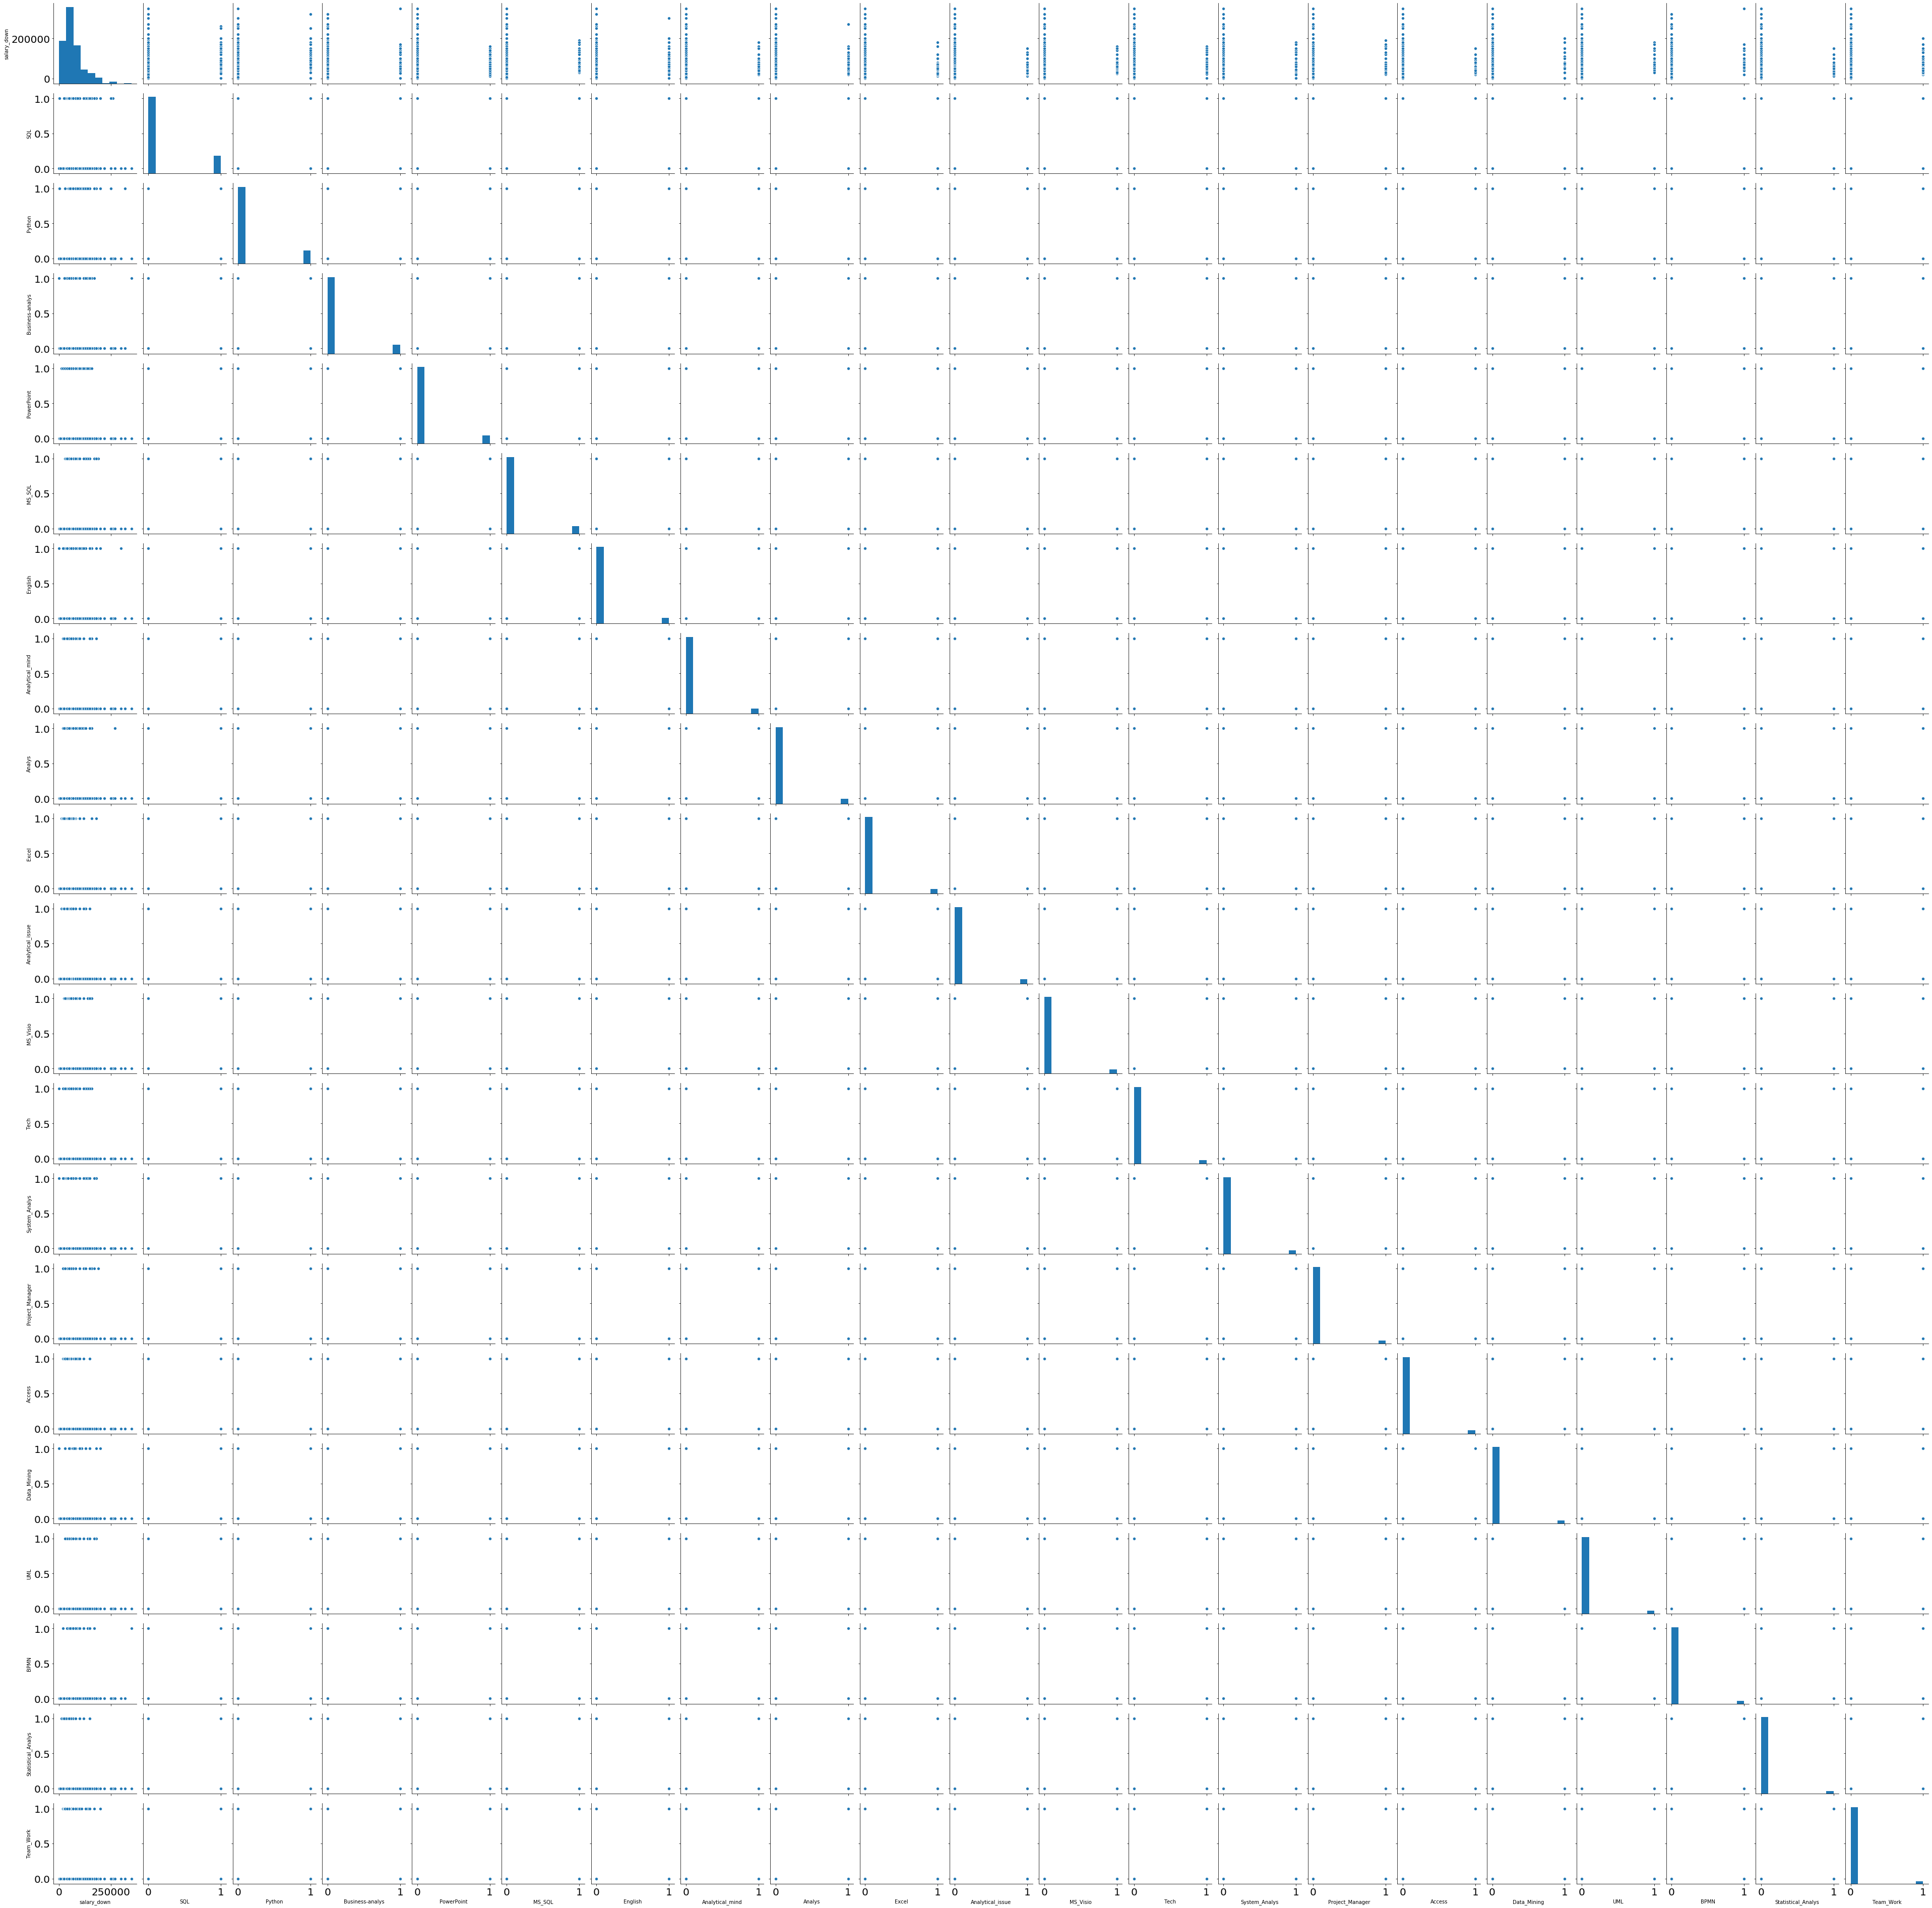

In [138]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig=plt.gcf()
fig.set_size_inches(45,30)
sns.pairplot(df_data_skills[['salary_down', 'SQL', 'Python', 'Business-analys', 'PowerPoint','MS_SQL', 'English', 'Analytical_mind', 'Analys', 'Excel', 'Analytical_issue', 'MS_Visio', 'Tech', 'System_Analys', 'Project_Manager', 'Access', 'Data_Mining', 'UML', 'BPMN', 'Statistical_Analys', 'Team_Work']])


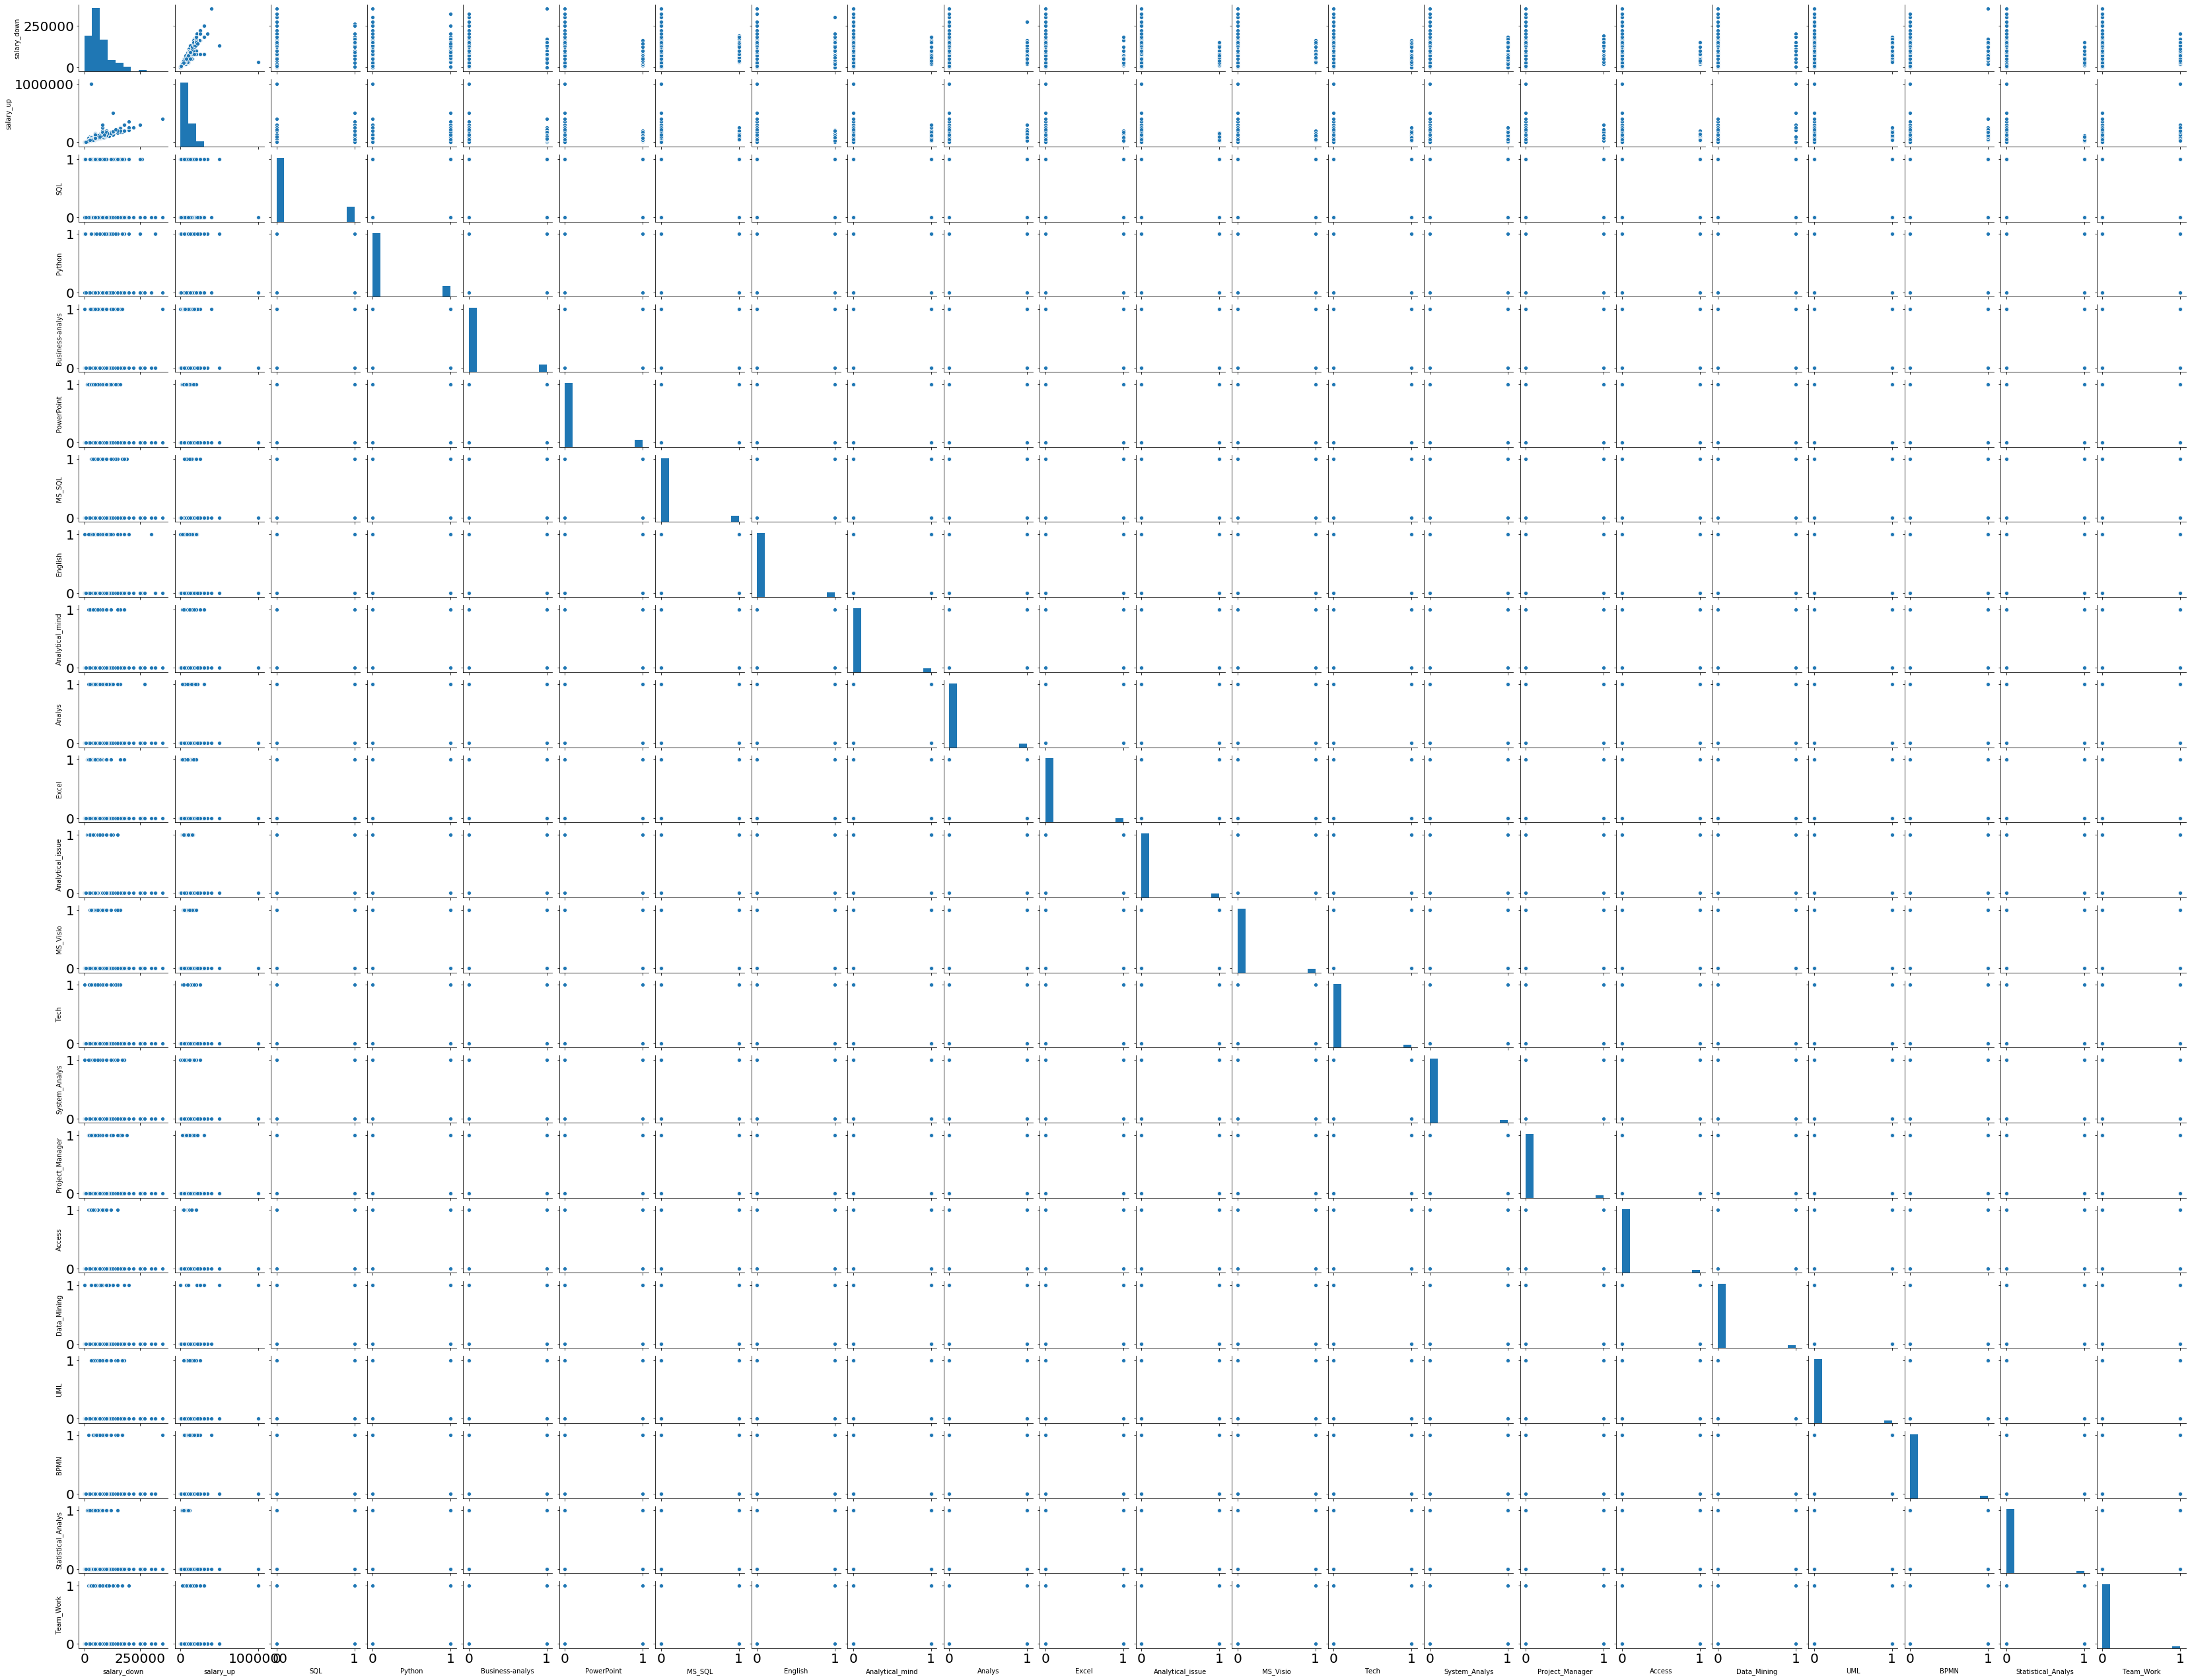

In [95]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig=plt.gcf()
fig.set_size_inches(45,35)
sns.pairplot(df_data_skills)


In [135]:
sql = df_data_skills[df_data_skills['SQL']== 1]
df_data.head()

,title,flag,experience,type_job,time_job,company_name,skills,date,where,salary_down,...,MS_Visio,Tech,System_Analys,Project_Manager,MS_Access,Data_Mining,UML,BPMN,Statistical_Analys,Team_Work
0,Аналитик (команда Поиска),data,1–3 года,Полная занятость,полный день,HeadHunter::Analytics/Data Science,"Анализ_данных,Математическая_статистика,SQL,Py...",2020-02-25,Москве,NaN,...,False,False,False,False,False,False,False,False,False,False
1,Data scientist/Портфельный аналитик,data,1–3 года,Полная занятость,полный день,"ООО, ,Поток.Диджитал","Python,Data_Mining,SQL,Моделирование,Портфельн...",2020-02-28,Москве,130000.0,...,False,False,False,False,False,False,False,False,False,False
2,Аналитик BI / Data scientist,data,1–3 года,Полная занятость,полный день,FBS Inc.,"SQL,Финансовое_моделирование,Математическое_мо...",2020-02-28,Санкт-Петербурге,NaN,...,False,False,False,False,False,False,False,False,False,False
3,Artificial Intelligence and Data Analytics Sci...,data,3–6 лет,Полная занятость,полный день,Aramco Innovations,artificial_intellegence,2020-02-29,Москве,NaN,...,False,False,False,False,False,False,False,False,False,False
4,Аналитик,data,1–3 года,Полная занятость,полный день,EASTEX,"VBA,MS_Access,MS_SQL_Server,ABC-анализ,Статист...",2020-02-29,Москве,100000.0,...,False,False,False,False,False,False,False,False,False,False


In [136]:
sql.sum(axis=0)

title                 Аналитик (команда Поиска)Data scientist/Портфе...
flag                  datadatadatadatadatadatadatadatadatadatadatada...
experience            1–3 года1–3 года3–6 лет1–3 года3–6 лет1–3 года...
type_job              Полная занятость Полная занятость Полная занят...
time_job              полный деньполный деньполный деньполный деньпо...
skills                Анализ_данных,Математическая_статистика,SQL,Py...
where                 МосквеМосквеМосквеНовосибирскеМосквеНижнемНовг...
salary_down                                                 1.41995e+07
salary_up                                                   1.27693e+07
type salary           з/п не указанана рукиз/п не указаназ/п не указ...
vacansy_url           https://hh.ru/vacancy/35121709https://hh.ru/va...
SQL                                                                1078
Python                                                              452
Business-analys                                                 

## Тоже не вариант, Кажется слишком долго. Почему бы не сохранить только нужные данные?

In [193]:
only_skills = pd.read_excel("skills.xlsx").fillna(value = 0)


In [194]:
only_skills

,salary_down,SQL,Python,Business-analys,PowerPoint,MS_SQL,English,Analytical_mind,Analys,Excel,...,MS_Visio,Tech,System_Analys,Project_Manager,Access,Data_Mining,UML,BPMN,Statistical_Analys,Team_Work
0,0.0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,130000.0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100000.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,0.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5730,90000.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5731,0.0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,1
5732,100000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
only_skills.groupby('SQL').sum().loc[1]

salary_down           14199500.0
Python                     452.0
Business-analys            157.0
PowerPoint                  83.0
MS_SQL                     305.0
English                    111.0
Analytical_mind             61.0
Analys                     105.0
Excel                       64.0
Analytical_issue            50.0
MS_Visio                    70.0
Tech                        76.0
System_Analys               85.0
Project_Manager             33.0
Access                      52.0
Data_Mining                134.0
UML                         83.0
BPMN                        57.0
Statistical_Analys          66.0
Team_Work                   25.0
Name: 1, dtype: float64

In [174]:
only_skills.groupby('Python').sum().loc[1]

salary_down           11377800.0
SQL                        452.0
Business-analys             40.0
PowerPoint                  33.0
MS_SQL                     117.0
English                     95.0
Analytical_mind             24.0
Analys                      89.0
Excel                       22.0
Analytical_issue            40.0
MS_Visio                     7.0
Tech                        10.0
System_Analys                4.0
Project_Manager              8.0
Access                      17.0
Data_Mining                190.0
UML                          2.0
BPMN                         1.0
Statistical_Analys          60.0
Team_Work                   14.0
Name: 1, dtype: float64

In [175]:
only_skills.groupby('Business-analys').sum().loc[1]

salary_down           9142500.0
SQL                       157.0
Python                     40.0
PowerPoint                 90.0
MS_SQL                     76.0
English                    57.0
Analytical_mind            91.0
Analys                     54.0
Excel                      31.0
Analytical_issue           78.0
MS_Visio                  125.0
Tech                      111.0
System_Analys             108.0
Project_Manager            87.0
Access                     32.0
Data_Mining                20.0
UML                        95.0
BPMN                      101.0
Statistical_Analys         23.0
Team_Work                  35.0
Name: 1, dtype: float64

In [176]:
only_skills.groupby('PowerPoint').sum().loc[1]

salary_down           8219200.0
SQL                        83.0
Python                     33.0
Business-analys            90.0
MS_SQL                     70.0
English                   131.0
Analytical_mind            76.0
Analys                     64.0
Excel                     103.0
Analytical_issue          102.0
MS_Visio                   68.0
Tech                       14.0
System_Analys               5.0
Project_Manager            40.0
Access                     97.0
Data_Mining                18.0
UML                         4.0
BPMN                        5.0
Statistical_Analys         68.0
Team_Work                  33.0
Name: 1, dtype: float64

In [177]:
only_skills.groupby('MS_SQL').sum().loc[1]

salary_down           5701000.0
SQL                       305.0
Python                    117.0
Business-analys            76.0
PowerPoint                 70.0
English                    50.0
Analytical_mind            37.0
Analys                     48.0
Excel                      47.0
Analytical_issue           35.0
MS_Visio                   40.0
Tech                       36.0
System_Analys              34.0
Project_Manager             9.0
Access                     42.0
Data_Mining                43.0
UML                        25.0
BPMN                       12.0
Statistical_Analys         41.0
Team_Work                  15.0
Name: 1, dtype: float64

In [178]:
only_skills.groupby('English').sum().loc[1]

salary_down           5709800.0
SQL                       111.0
Python                     95.0
Business-analys            57.0
PowerPoint                131.0
MS_SQL                     50.0
Analytical_mind            44.0
Analys                     39.0
Excel                      36.0
Analytical_issue           50.0
MS_Visio                   28.0
Tech                       22.0
System_Analys               9.0
Project_Manager            22.0
Access                     31.0
Data_Mining                22.0
UML                        14.0
BPMN                       10.0
Statistical_Analys         17.0
Team_Work                  20.0
Name: 1, dtype: float64

In [179]:
only_skills.groupby('Analytical_mind').sum().loc[1]

salary_down           7358500.0
SQL                        61.0
Python                     24.0
Business-analys            91.0
PowerPoint                 76.0
MS_SQL                     37.0
English                    44.0
Analys                    109.0
Excel                      76.0
Analytical_issue          108.0
MS_Visio                   37.0
Tech                       33.0
System_Analys              39.0
Project_Manager            34.0
Access                     41.0
Data_Mining                 4.0
UML                         7.0
BPMN                       13.0
Statistical_Analys         35.0
Team_Work                  35.0
Name: 1, dtype: float64

In [180]:
only_skills.groupby('Analys').sum().loc[1]

salary_down           5561600.0
SQL                       105.0
Python                     89.0
Business-analys            54.0
PowerPoint                 64.0
MS_SQL                     48.0
English                    39.0
Analytical_mind           109.0
Excel                      75.0
Analytical_issue           79.0
MS_Visio                    7.0
Tech                        7.0
System_Analys              17.0
Project_Manager            18.0
Access                     31.0
Data_Mining                38.0
UML                         1.0
BPMN                        2.0
Statistical_Analys         60.0
Team_Work                  26.0
Name: 1, dtype: float64

In [181]:
only_skills.groupby('Excel').sum().loc[1]

salary_down           4665480.0
SQL                        64.0
Python                     22.0
Business-analys            31.0
PowerPoint                103.0
MS_SQL                     47.0
English                    36.0
Analytical_mind            76.0
Analys                     75.0
Analytical_issue           38.0
MS_Visio                   16.0
Tech                        4.0
System_Analys               6.0
Project_Manager            13.0
Access                     31.0
Data_Mining                 6.0
UML                         3.0
BPMN                        8.0
Statistical_Analys         24.0
Team_Work                  15.0
Name: 1, dtype: float64

In [182]:
only_skills.groupby('Analytical_issue').sum().loc[1]

salary_down           5993540.0
SQL                        50.0
Python                     40.0
Business-analys            78.0
PowerPoint                102.0
MS_SQL                     35.0
English                    50.0
Analytical_mind           108.0
Analys                     79.0
Excel                      38.0
MS_Visio                   18.0
Tech                       13.0
System_Analys              15.0
Project_Manager            22.0
Access                     51.0
Data_Mining                16.0
UML                         1.0
BPMN                        2.0
Statistical_Analys         65.0
Team_Work                  20.0
Name: 1, dtype: float64

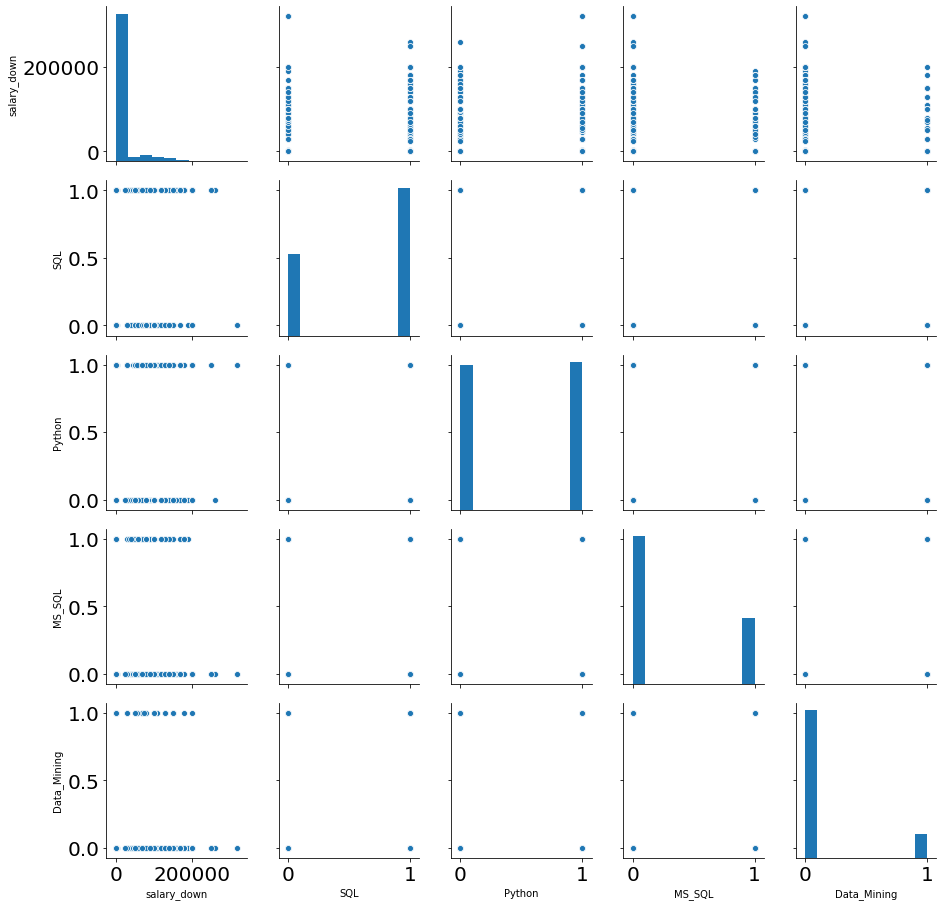

In [211]:
Hard_skills = only_skills[(only_skills['SQL'] == 1) | (only_skills['Python'] == 1)| (only_skills['MS_SQL']== 1) | (only_skills['Data_Mining']== 1)]

sns.pairplot(Hard_skills[['salary_down', 'SQL', 'Python', 'MS_SQL', 'Data_Mining']])

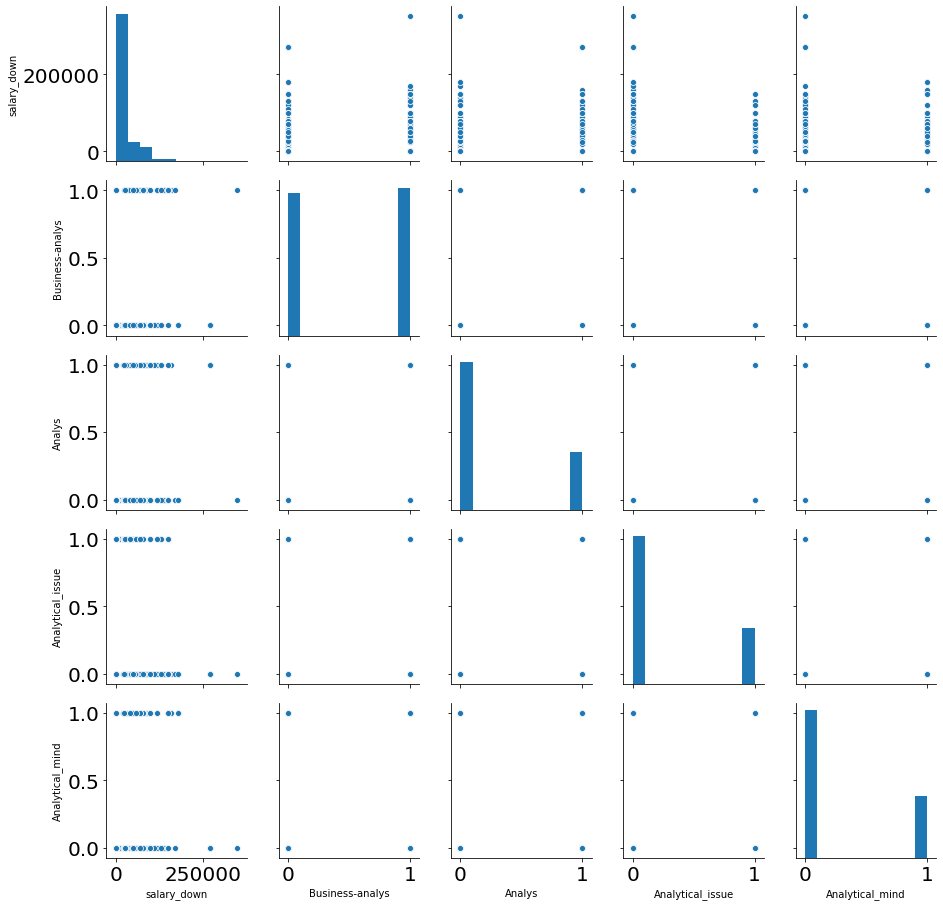

In [217]:
Soft_skills = only_skills[(only_skills['Business-analys'] == 1) | (only_skills['Analys'] == 1)| (only_skills['Analytical_issue']== 1) | (only_skills['Analytical_mind']== 1)]

sns.pairplot(Soft_skills[['salary_down', 'Business-analys', 'Analys', 'Analytical_issue', 'Analytical_mind']])

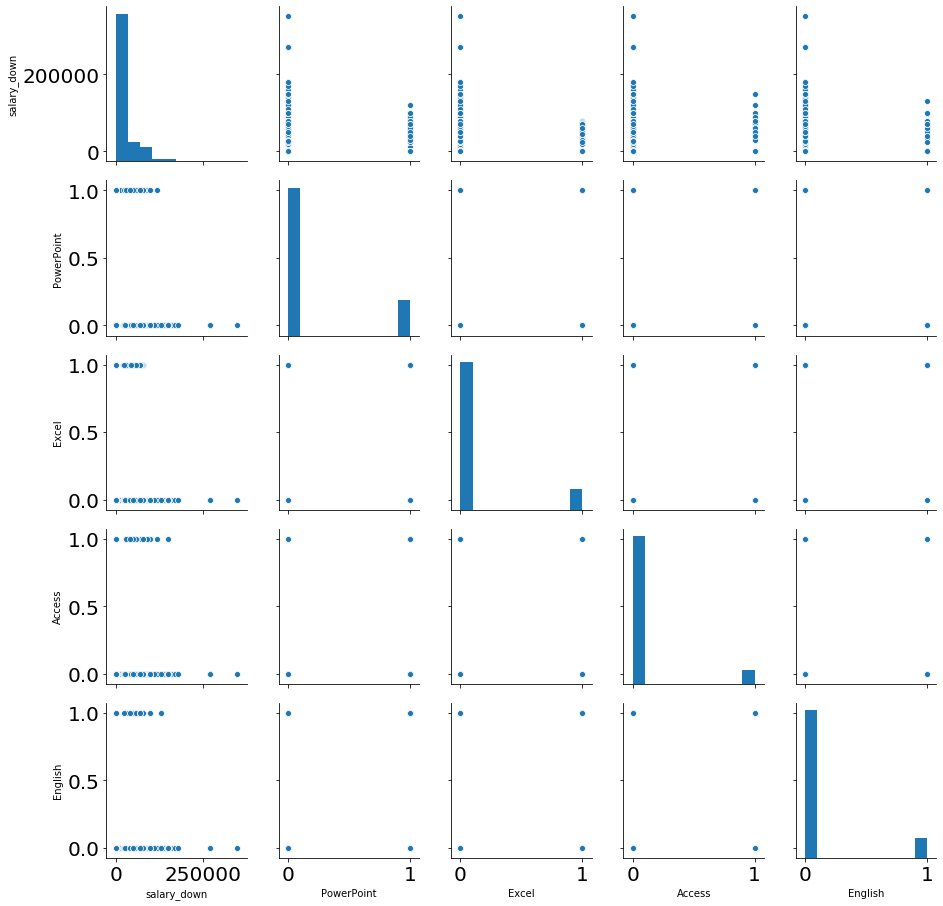

In [235]:
MSOffice_skills = only_skills[(only_skills['PowerPoint'] == 1) | (only_skills['Excel'] == 1)| (only_skills['Access']== 1) | (only_skills['English']== 1)]

sns.pairplot(Soft_skills[['salary_down', 'PowerPoint', 'Excel', 'Access', 'English']])

<Figure size 1800x1080 with 0 Axes>

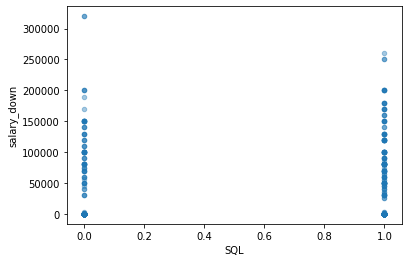

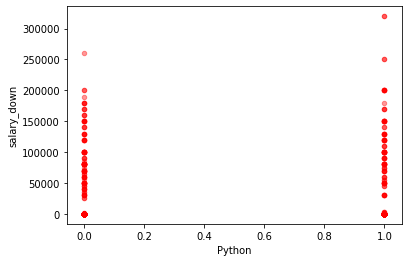

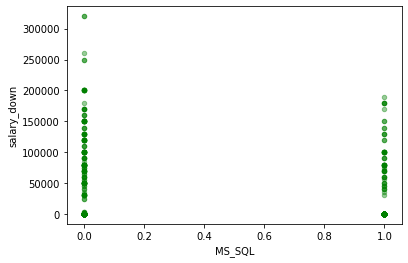

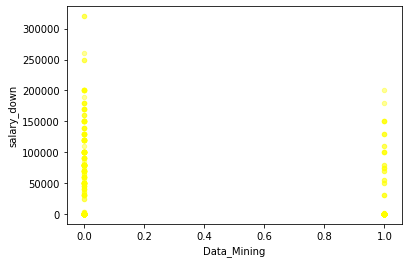

In [282]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
fig=plt.gcf()
fig.set_size_inches(25,15)
Hard_skills.plot.scatter(x='SQL',y='salary_down', alpha = 0.4)
Hard_skills.plot.scatter(x='Python',y='salary_down', color='red', alpha = 0.4)
Hard_skills.plot.scatter(x='MS_SQL',y='salary_down', color='green', alpha = 0.4)
Hard_skills.plot.scatter(x='Data_Mining',y='salary_down', color='yellow', alpha = 0.4)
plt.show()

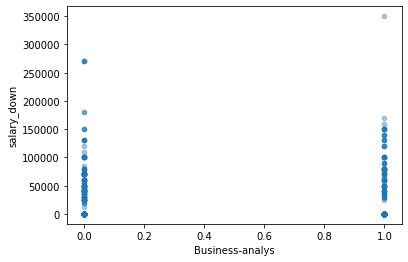

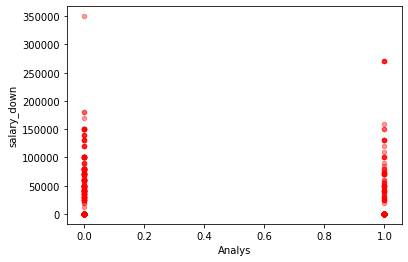

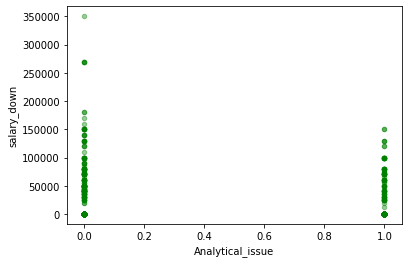

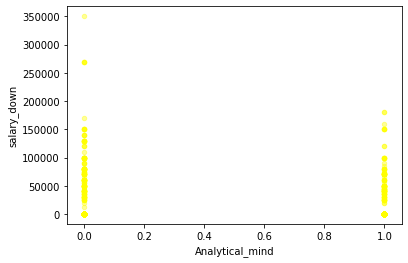

In [283]:
Soft_skills.plot.scatter(x='Business-analys',y='salary_down', alpha = 0.4)
Soft_skills.plot.scatter(x='Analys',y='salary_down', color='red', alpha = 0.4)
Soft_skills.plot.scatter(x='Analytical_issue',y='salary_down', color='green', alpha = 0.4)
Soft_skills.plot.scatter(x='Analytical_mind',y='salary_down', color='yellow', alpha = 0.4)
plt.show()

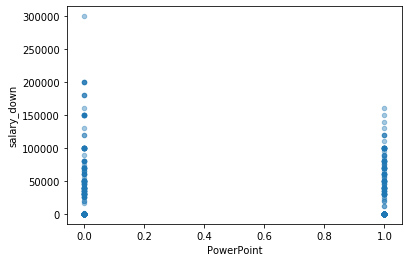

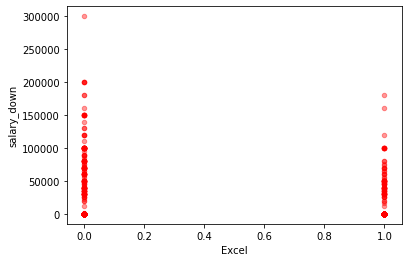

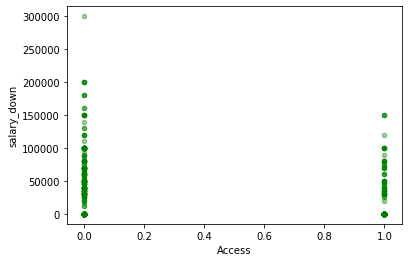

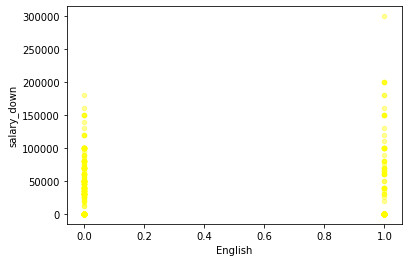

In [284]:
MSOffice_skills.plot.scatter(x='PowerPoint',y='salary_down', alpha = 0.4)
MSOffice_skills.plot.scatter(x='Excel',y='salary_down', color='red', alpha = 0.4)
MSOffice_skills.plot.scatter(x='Access',y='salary_down', color='green', alpha = 0.4)
MSOffice_skills.plot.scatter(x='English',y='salary_down', color='yellow', alpha = 0.4)
plt.show()

## Да, так получилось гораздо лучше. Теперь выведем подсчет уникальных слов, чтобы выяснить топ 20

In [53]:
def listmerge(lstlst):
    all=[]
    for lst in lstlst:
      all.extend(lst)
    return all

In [54]:
counter = listmerge(skill_list)
counter1 = []
for i in counter:
    i = i.lstrip().lower()
    counter1.append(i)
counter1

['data_mining',
 'python',
 'sql',
 'data_science',
 'hadoop',
 'hive',
 'numpy',
 'scipy',
 'statsmodel',
 'анализ_данных',
 'математическая_статистика',
 'data_mining',
 'python',
 'sql',
 'анализ_данных',
 'математическая_статистика',
 'математическое_моделирование',
 'моделирование',
 'портфельные_риски',
 'business_intelligence',
 'postgresql',
 'python',
 'r',
 'sql',
 'web_аналитика',
 'data_science',
 'machine_learning',
 'веб-аналитика',
 'конкурентная_аналитика',
 'математическое_моделирование',
 'финансовое_моделирование',
 'artificial_intellegence',
 'abc-анализ',
 'ms_access',
 'ms_sql_server',
 'vba',
 'анализ_бизнес_показателей',
 'аналитика_продаж',
 'математический_анализ',
 'статистический_анализ',
 'java',
 'linux',
 'mysql',
 'php',
 'sql',
 'python',
 'sql',
 'аналитические_исследования',
 'английский_язык',
 'бизнес-анализ',
 'big_data',
 'data_analysis',
 'python',
 'ms_access',
 'ms_excel',
 'ms_powerpoint',
 'ms_sql',
 'sql',
 'vba',
 'анализ_данных',
 'аналити

In [55]:
import re
from collections import Counter
information = Counter(counter1)

information

Counter({'data_mining': 226,
         'python': 838,
         'sql': 1306,
         'data_science': 75,
         'hadoop': 123,
         'hive': 30,
         'numpy': 28,
         'scipy': 11,
         'statsmodel': 1,
         'анализ_данных': 328,
         'математическая_статистика': 141,
         'математическое_моделирование': 84,
         'моделирование': 9,
         'портфельные_риски': 3,
         'business_intelligence': 13,
         'postgresql': 108,
         'r': 59,
         'web_аналитика': 42,
         'machine_learning': 116,
         'веб-аналитика': 58,
         'конкурентная_аналитика': 14,
         'финансовое_моделирование': 48,
         'artificial_intellegence': 1,
         'abc-анализ': 25,
         'ms_access': 234,
         'ms_sql_server': 107,
         'vba': 133,
         'анализ_бизнес_показателей': 63,
         'аналитика_продаж': 64,
         'математический_анализ': 76,
         'статистический_анализ': 205,
         'java': 162,
         'linux': 145,


In [56]:
with open('dict.txt','w') as i:
    for key,val in information.items():
        i.write('{}:{}\n'.format(key,val))

In [57]:
df_skills = pd.read_csv("dict.csv")
df_skills.head(20)

,skiils,count
0,SQL,1306
1,Python,839
2,Бизнес-анализ,591
3,MS PowerPoint,559
4,MS SQL,491
5,Английский язык,415
6,Аналитическое мышление,343
7,Анализ данных,328
8,MS Excel,327
9,Аналитические исследования,319


## Резюме


In [58]:
df_resume = pd.read_excel("resume_cleaned.xlsx")
df_resume.head()

,vacancy_name,gender,age,city,skills,experience_year,experience_month,last_job,resume_url
0,Data Scientist,Male,NaN,Москва,"SQL,Python,NumPy,pandas,Machine Learning,sklea...",5.0,9,NaN,https://hh.ru/resume/eba531c30006567ca70039ed1...
1,Data Engineer / Project Manager,Male,33.0,Москва,"Booking Hotels,Analytical skills,Data Analysis...",12.0,1,Леруа Мерлен,https://hh.ru/resume/f4fc3b2700028167ac0039ed1...
2,Управляющий активами,Male,37.0,Москва,"Python,R,SQL,Риск-менеджмент,Tableau,Управлени...",15.0,5,"Пермский государственный университет, Пермь",https://hh.ru/resume/68f5f69c00015d0ec70039ed1...
3,Junior Data science (intern),Male,20.0,Москва,"C++,Python,Sklearn,Pandas,Numpy,Keras,Git,ADO....",0.0,4,Acronis,https://hh.ru/resume/ed6cef170005e942a70039ed1...
4,Big Data аналитик/ Python developer,Male,35.0,Москва,"Составление бизнес-плана,Работа С Отчетностью,...",12.0,5,РосБизнесКонсалтинг,https://hh.ru/resume/2a751cb000019d3d910039ed1...


In [161]:
df_resume.describe()

,age,experience_year
count,2757.000000,2892.000000
mean,33.670294,11.012794
std,8.643548,7.244424
min,14.000000,0.000000
25%,27.000000,5.000000
50%,33.000000,11.000000
75%,39.000000,16.000000
max,119.000000,43.000000


Text(0, 0.5, 'frequency')

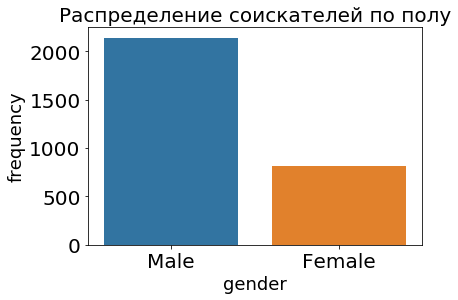

In [195]:
sns.countplot(x= 'gender', data = df_resume)
plt.title ('Распределение соискателей по полу', fontsize=20)
plt.xlabel('gender', fontsize=18)
plt.ylabel('frequency', fontsize=18)

Text(0, 0.5, 'gender')

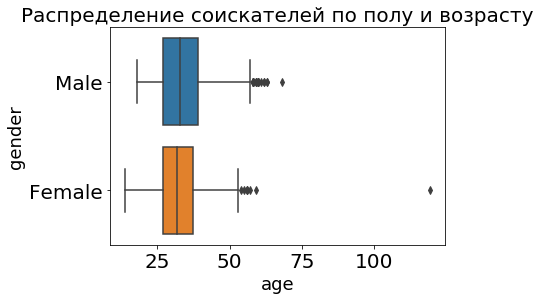

In [196]:
sns.boxplot(y = 'gender', x ='age', data = df_resume)
plt.title ('Распределение соискателей по полу и возрасту', fontsize=20)
plt.xlabel('age', fontsize=18)
plt.ylabel('gender', fontsize=18)

In [212]:
df_city = df_resume ['city'].value_counts(ascending = False)
df_city.head(20)

Москва             2607
Санкт-Петербург      67
Алматы               17
Екатеринбург         12
Нур-Султан            9
Нижний Новгород       9
Уфа                   9
Минск                 8
Новосибирск           7
Калининград           7
Челябинск             7
Самара                7
Краснодар             7
Казань                7
Germany               4
Баку                  4
USA                   4
Тюмень                4
Ростов-на-Дону        4
Хабаровск             3
Name: city, dtype: int64

In [214]:
skilllist(df_resume['skills'])

[['Data Analysis',
  'Data Mining',
  'LightGBM',
  'Machine Learning',
  'NumPy',
  'Python',
  'SQL',
  'XGBoost',
  'pandas',
  'sklearn'],
 ['Analytical skills',
  'Booking Hotels',
  'Customer Relationship Management',
  'Customer Service',
  'Customer Support',
  'Data Analysis',
  'E-Commerce',
  'MS Office',
  'Opera',
  'SQL',
  'Shipping'],
 ['Kaggle',
  'Python',
  'R',
  'SQL',
  'Tableau',
  'Алгоритмическая торговля',
  'Валютный рынок',
  'Инвестиционный консалтинг',
  'Количественное инвестрирование',
  'Машинное обучение',
  'Риск-менеджмент',
  'Управление рисками',
  'Фондовый рынок'],
 ['ADO.NET',
  'Analytical skills',
  'C#',
  'C++',
  'C++17',
  'Git',
  'JSON API',
  'Java',
  'JavaScript',
  'Keras',
  'Linear Algebra',
  'Matplotlib',
  'Numpy',
  'Pandas',
  'Python',
  'STL',
  'Seaborn',
  'Sklearn',
  'XML'],
 ['Big Data',
  'Django Framework',
  'Machine Learning',
  'Python',
  'Анализ данных',
  'Аналитическое мышление',
  'Навыки переговоров',
  'Рабо

In [217]:
counter = listmerge(skill_list)
counter1 = []
for i in counter:
    i = i.lstrip()
    counter1.append(i)
counter1

['Data Analysis',
 'Data Mining',
 'LightGBM',
 'Machine Learning',
 'NumPy',
 'Python',
 'SQL',
 'XGBoost',
 'pandas',
 'sklearn',
 'Analytical skills',
 'Booking Hotels',
 'Customer Relationship Management',
 'Customer Service',
 'Customer Support',
 'Data Analysis',
 'E-Commerce',
 'MS Office',
 'Opera',
 'SQL',
 'Shipping',
 'Kaggle',
 'Python',
 'R',
 'SQL',
 'Tableau',
 'Алгоритмическая торговля',
 'Валютный рынок',
 'Инвестиционный консалтинг',
 'Количественное инвестрирование',
 'Машинное обучение',
 'Риск-менеджмент',
 'Управление рисками',
 'Фондовый рынок',
 'ADO.NET',
 'Analytical skills',
 'C#',
 'C++',
 'C++17',
 'Git',
 'JSON API',
 'Java',
 'JavaScript',
 'Keras',
 'Linear Algebra',
 'Matplotlib',
 'Numpy',
 'Pandas',
 'Python',
 'STL',
 'Seaborn',
 'Sklearn',
 'XML',
 'Big Data',
 'Django Framework',
 'Machine Learning',
 'Python',
 'Анализ данных',
 'Аналитическое мышление',
 'Навыки переговоров',
 'Работа С Отчетностью',
 'Составление бизнес-плана',
 'A/B тесты',
 'B

In [219]:
import re
from collections import Counter
information = Counter(counter1)

information

Counter({'Data Analysis': 305,
         'Data Mining': 83,
         'LightGBM': 5,
         'Machine Learning': 56,
         'NumPy': 13,
         'Python': 472,
         'SQL': 400,
         'XGBoost': 4,
         'pandas': 31,
         'sklearn': 17,
         'Analytical skills': 278,
         'Booking Hotels': 1,
         'Customer Relationship Management': 68,
         'Customer Service': 67,
         'Customer Support': 13,
         'E-Commerce': 50,
         'MS Office': 334,
         'Opera': 14,
         'Shipping': 3,
         'Kaggle': 4,
         'R': 54,
         'Tableau': 43,
         'Алгоритмическая торговля': 1,
         'Валютный рынок': 1,
         'Инвестиционный консалтинг': 7,
         'Количественное инвестрирование': 1,
         'Машинное обучение': 28,
         'Риск-менеджмент': 9,
         'Управление рисками': 41,
         'Фондовый рынок': 7,
         'ADO.NET': 5,
         'C#': 89,
         'C++': 93,
         'C++17': 1,
         'Git': 262,
         'JS

In [220]:
with open('dict_resume.txt','w') as i:
    for key,val in information.items():
        i.write('{}:{}\n'.format(key,val))